### **Mounting Google Drive in Colab for Seamless Data Access**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
#create a kaggle folder
! mkdir ~/.kaggle
#copy the kaggle .josn to folder created
! cp kaggle.json ~/.kaggle/
#permission for the json the act
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
! kaggle datasets download -d gunavenkatdoddi/eye-diseases-classification
! unzip eye-diseases-classification

Saving kaggle.json to kaggle.json
ref                                                          title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                      Most Streamed Spotify Songs 2023                   47KB  2023-08-26 11:04:57          27028        816  1.0              
iamsouravbanerjee/customer-shopping-trends-dataset           Customer Shopping Trends Dataset                  146KB  2023-10-05 06:45:37           2340         54  1.0              
nelgiriyewithana/credit-card-fraud-detection-dataset-2023    Credit Card Fraud Detection Dataset 2023          143MB  2023-09-18 10:00:19           4176        137  1.0              
nelgiriyewithana/billionaires-statistics-dataset   

## **Explore images**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
%config InlineBackend.figure_format = 'retina'

### **Number of images in dataset:**

In [ ]:
import fnmatch
import os

In [ ]:
# image files count
cataract_count = len(fnmatch.filter(os.listdir('./dataset/cataract'), '*.*'))
dre_count = len(fnmatch.filter(os.listdir('./dataset/diabetic_retinopathy'), '*.*'))
glaucoma_count = len(fnmatch.filter(os.listdir('./dataset/glaucoma'), '*.*'))
normal_count = len(fnmatch.filter(os.listdir('./dataset/normal'), '*.*'))
total_image_count = cataract_count + dre_count + \
                    glaucoma_count + normal_count
# print count
print('---Categories---')
print('Cataract:', cataract_count)
print('Diabetic retinopathy:', dre_count)
print('Glaucoma:', glaucoma_count)
print('Normal', normal_count)
print()
print('---Total image count---')
print(total_image_count)

---Categories---
Cataract: 1038
Diabetic retinopathy: 1098
Glaucoma: 1007
Normal 1074

---Total image count---
4217


### **Image dimensions, properties:**

In [ ]:
from PIL import Image

In [ ]:
# load example image
im = Image.open('./dataset/glaucoma/1495_left.jpg')
# summarize some details about the image
print(im.format)
print(im.mode)
print(im.size) # size already 512 x 512

pixels = np.asarray(im)
print(pixels[0])
print(pixels.shape) # 3 channel last

JPEG
RGB
(512, 512)
[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]
(512, 512, 3)


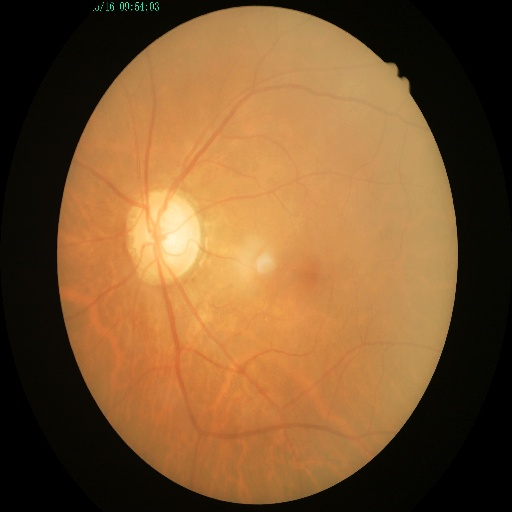

In [ ]:
#Import library
from IPython import display
display.Image(filename='./dataset/glaucoma/1495_left.jpg', width=200, height=150)

In [ ]:
# calculate image pixel mean, min, max

mean = pixels.mean()
print('Mean: %.3f' % mean)
# confirm pixel range is 0-255
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Mean: 86.173
Min: 0.000, Max: 255.000


###**Image hashing**

***To identify any duplicate images***


In [ ]:
import hashlib
import glob

In [ ]:
def img_hash(images, dir): # dir is string of subdirectory
    # https://stackoverflow.com/questions/22058048/hashing-a-file-in-python
    hash_list = [] # list of tuples (filename, hash)
    for image in images:
      with open(image, "rb") as f:
          hash = hashlib.blake2b(f.read()).hexdigest() # extract hash code
          filename = os.path.basename(image) # extract subdirectory and filename
          dir_filename = os.path.join(dir, filename)
          hash_list.append((dir_filename, hash))
          hash_df = pd.DataFrame(hash_list, columns=['filename','hash']) # dataframe of filenames & hashes
    return hash_df

In [ ]:
# hash cataract images
cataract_imgs = glob.glob("./dataset/cataract/*.*")
print(img_hash(images = cataract_imgs, dir='cataract')[:3]) # check format
# assign object to list
cataract_hashdf = img_hash(images = cataract_imgs, dir='cataract')

                    filename  \
0    cataract/2218_right.jpg   
1  cataract/_125_6571967.jpg   
2   cataract/_83_8570399.jpg   

                                                hash  
0  3faaf4c1d5a4c1d3b1c7ab42d215d336d7c6160258e5fb...  
1  3cc304c3141149288dbdd159b73067b0da4c0857ea98d1...  
2  263ec3db688122188d8608cd5ca7395ac68e0e89986f44...  


In [ ]:
# hash diabetic retinopathy images
dre_imgs = glob.glob("./dataset/diabetic_retinopathy/*.*")
dre_hashdf = img_hash(images = dre_imgs, dir='dre')

In [ ]:
# hash glaucoma images
glaucoma_imgs = glob.glob("./dataset/glaucoma/*.*")
glaucoma_hashdf = img_hash(images = glaucoma_imgs, dir='glaucoma')

In [ ]:
# hash normal images
normal_imgs = glob.glob("./dataset/normal/*.*")
normal_hashdf = img_hash(images = normal_imgs, dir='normal')

In [ ]:
# join all the hash dataframes together
hash_df = pd.concat([cataract_hashdf, dre_hashdf, glaucoma_hashdf, normal_hashdf], ignore_index=True)
# check hash_list count # should be 4217
len(hash_df)

4217

#### **Search for duplicate hash codes:**

In [ ]:
duplicate_hashes = hash_df[hash_df.duplicated('hash', keep=False)] # based on hash codes only
print("Duplicate images based on hashcodes:")
print(duplicate_hashes) # 2 duplicate hashes.

Duplicate images based on hashcodes:
                     filename  \
543     cataract/625_left.jpg   
702   cataract/1415_right.jpg   
2660    glaucoma/625_left.jpg   
2824  glaucoma/1415_right.jpg   

                                                   hash  
543   9b41fcbbbdd4a1429f16d915f026d87f7a94f9a77eb3ef...  
702   a029f6e63fa8919142ac8a4c024caf81db515aa44bf4a7...  
2660  9b41fcbbbdd4a1429f16d915f026d87f7a94f9a77eb3ef...  
2824  a029f6e63fa8919142ac8a4c024caf81db515aa44bf4a7...  


## **Visualise preprocessed images**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
print(tf.__version__) #2.8.2

2.13.0


**What happens after resizing and rescaling:**

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(160,160) ,  # needs to be symmetrical
    layers.Rescaling(1./255) # desired height, width in model pipeline
])

result = resize_and_rescale(pixels)
print(result.shape) # new shape, channels

(160, 160, 3)


**What happens to image pixel values after rescaling:**

In [ ]:
print("Min and max pixel values:", result.numpy().min(), result.numpy().max())

Min and max pixel values: 0.0 1.0


**Show images before and after preprocessing:**

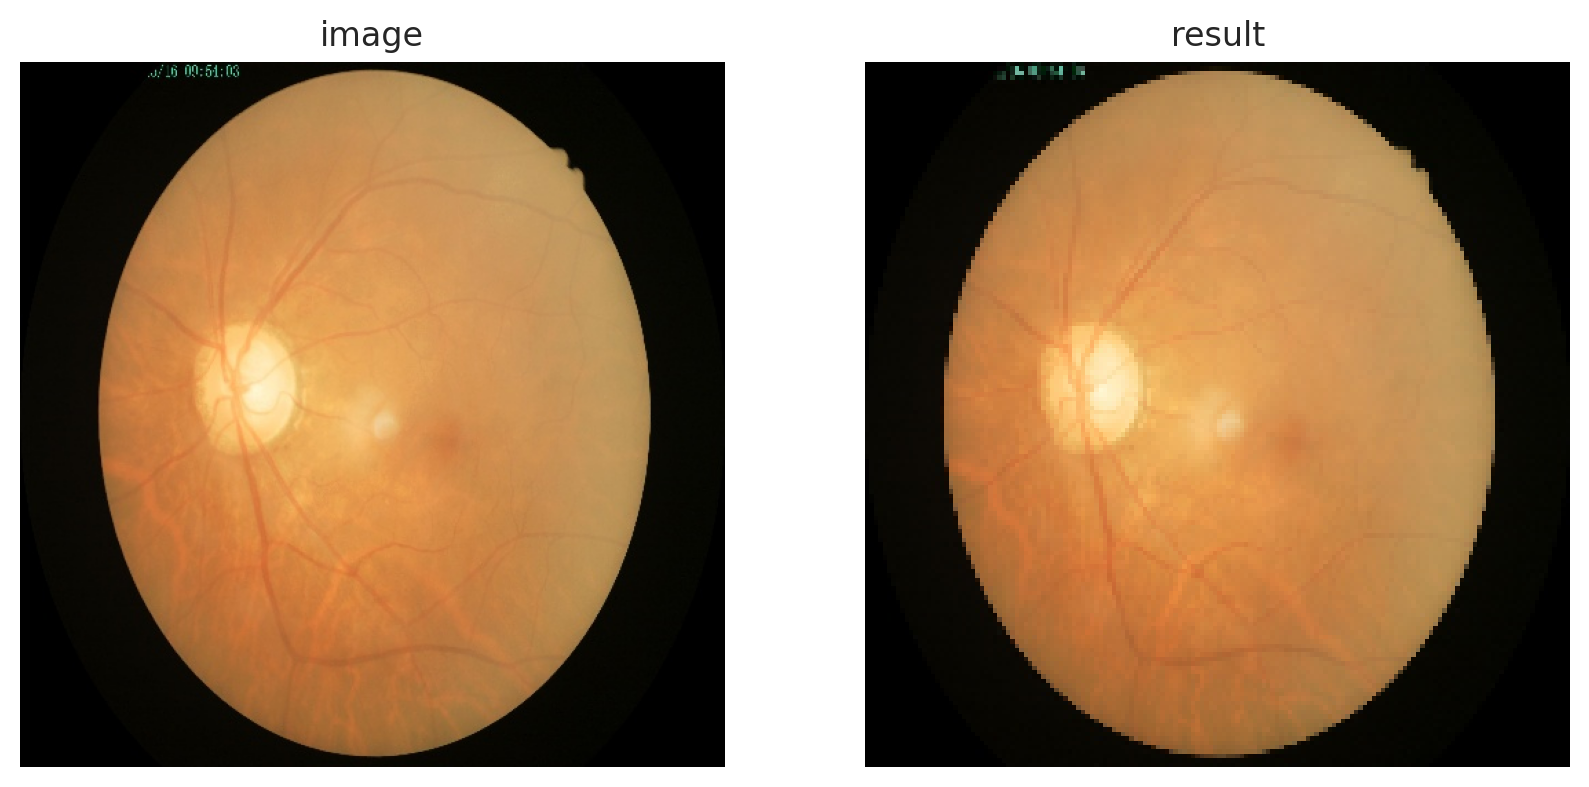

In [ ]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10,8))
ax0.imshow(im)
ax0.axis('off')
ax0.set_title('image')
# after pixel normalisation
ax1.imshow(result)
ax1.axis('off')
ax1.set_title('result')
plt.show() # result seems to have slight blurring of image, but still good definition

## **Create train, validation and test datasets**

In [ ]:
!pip install split-folders

In [ ]:
# first allocate a test set using this library
import splitfolders

splitfolders.ratio('./dataset/', output="./work_directory/", seed=1, ratio=(.5,.25,.25))

Copying files: 4217 files [00:01, 3214.78 files/s]


In [ ]:
# generate dataset that can be used for machine learning
from tensorflow.keras.utils import image_dataset_from_directory

image_size = (160, 160) # very important to get this right, will determine model success
batch_size = 32

train_ds = image_dataset_from_directory(
    './work_directory/train',
    image_size=image_size,
    shuffle=False,
    #labels='inferred',
    seed=1,
    batch_size=batch_size,
    label_mode='categorical'
)

val_ds = image_dataset_from_directory(
    './work_directory/val',
    image_size=image_size,
    shuffle=False,
    #labels='inferred',
    seed=1,
    batch_size=batch_size,
    label_mode='categorical'
)

test_ds = image_dataset_from_directory( # for model evaluation later
    './work_directory/test',
    image_size=image_size,
    #labels='inferred',
    seed=1,
    shuffle=False,
    batch_size=batch_size,
    label_mode='categorical'
)

Found 2108 files belonging to 4 classes.
Found 1052 files belonging to 4 classes.
Found 1057 files belonging to 4 classes.


In [ ]:
# preview of how images are labelled
class_names = train_ds.class_names
print(class_names)

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']


### **Visualise images and labels together**

In [ ]:
# visualise label format # one-hot encoded
for _, labels in train_ds.take(1):
  print(labels[0])
  print(tf.argmax(labels[0], axis=0))
  break

tf.Tensor([1. 0. 0. 0.], shape=(4,), dtype=float32)
tf.Tensor(0, shape=(), dtype=int64)


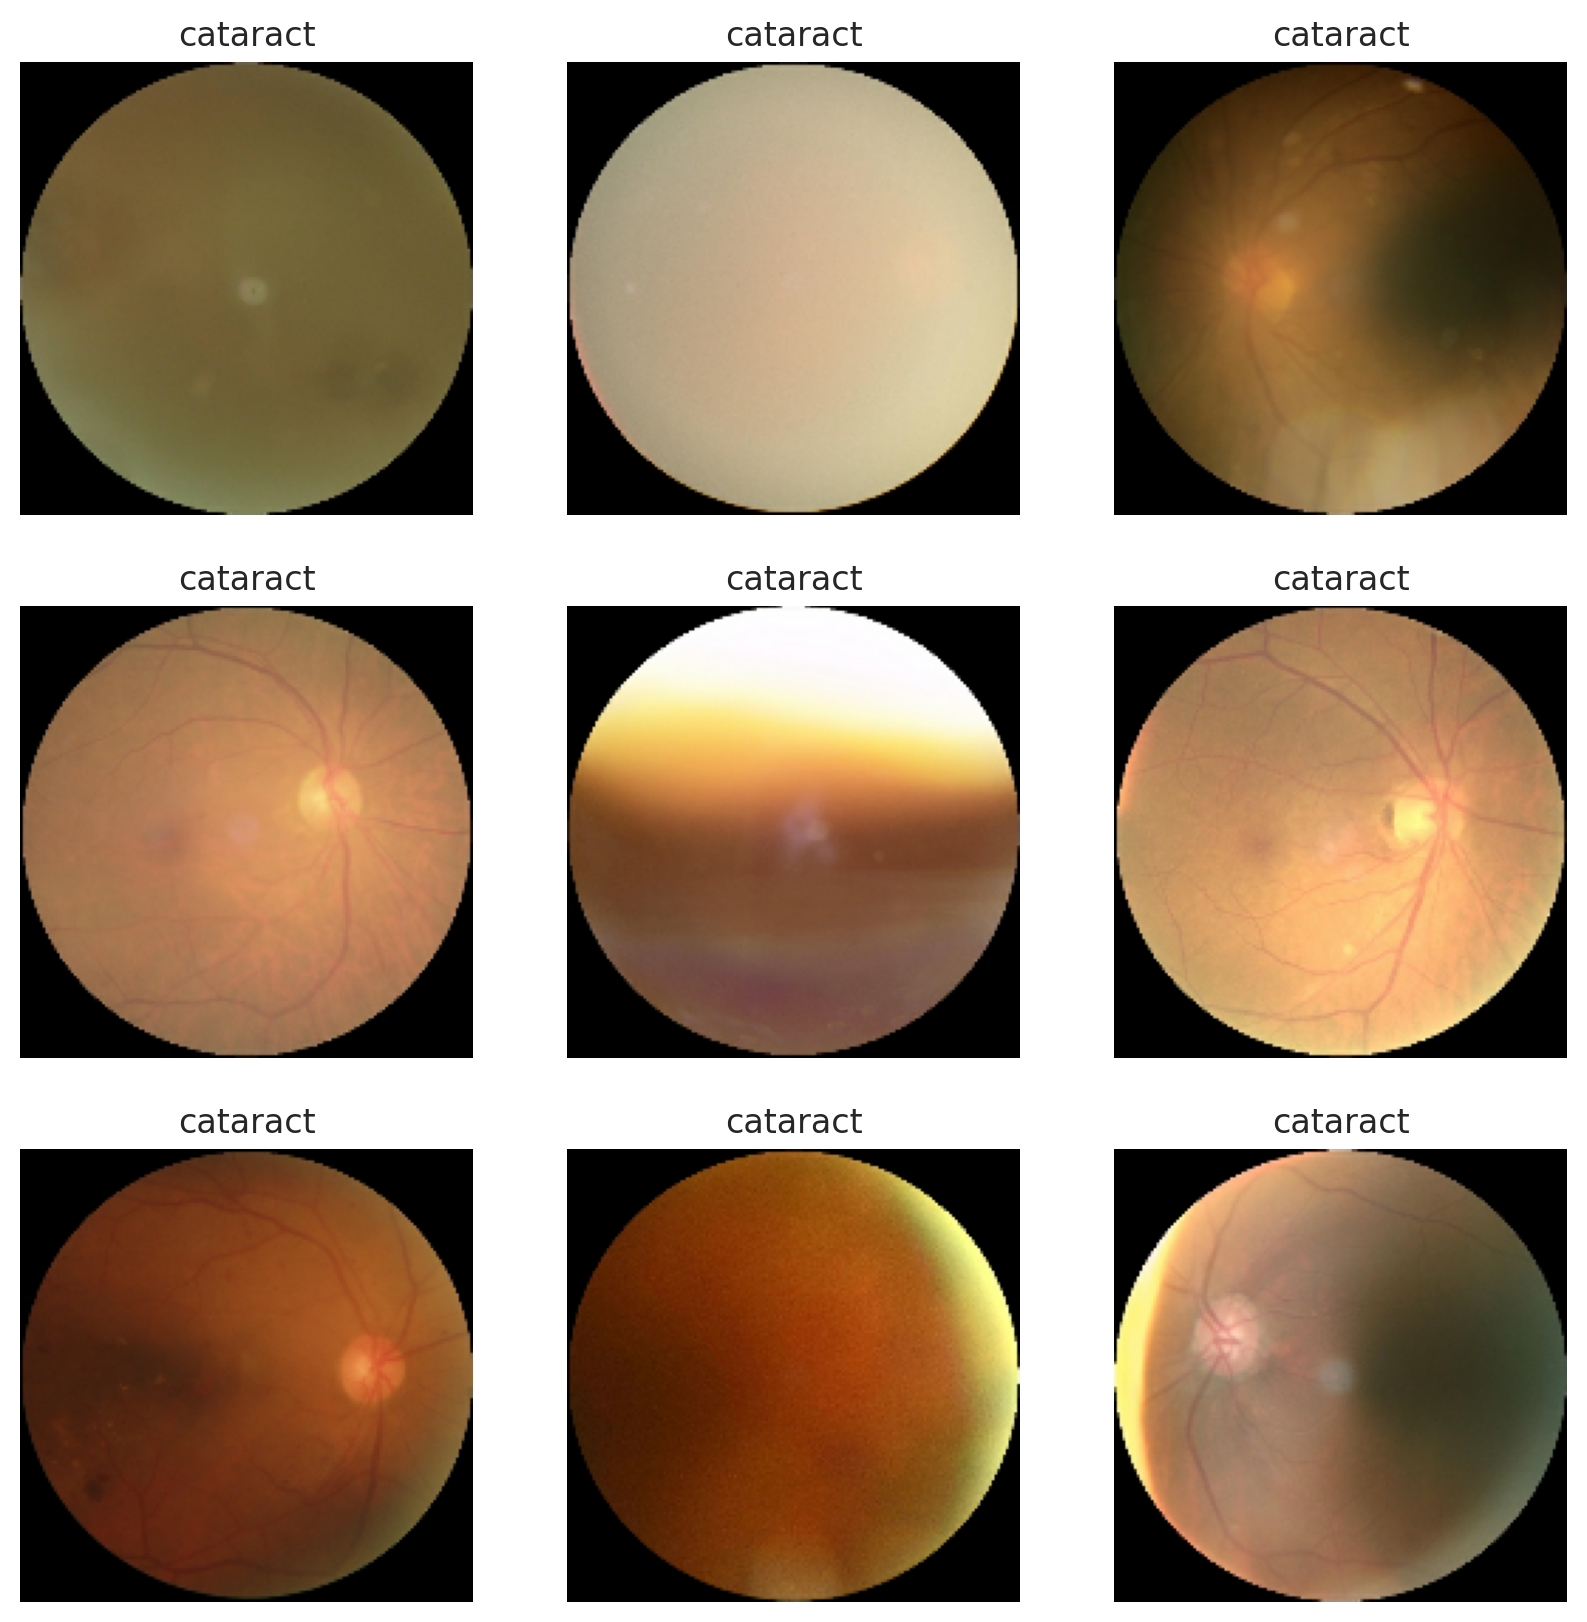

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1): # each image 160 x 160
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[tf.argmax(labels[i], axis=0)])
    plt.axis("off")

## **Data augmentation**

In [ ]:
data_augmentation = tf.keras.Sequential(
    [ layers.RandomFlip("horizontal"),
      layers.RandomRotation(0.1),
      layers.RandomContrast(0.1)
    ])

### **Visualise augmented images**

In [ ]:
def augmented_img():
  for image, _ in train_ds.take(1):  # take a sample image from training set
    plt.figure(figsize=(8, 8))
    first_image = image[0]
    for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
      plt.imshow(augmented_image[0] / 255) # rescale pixel 0 to 1
      plt.axis("off")

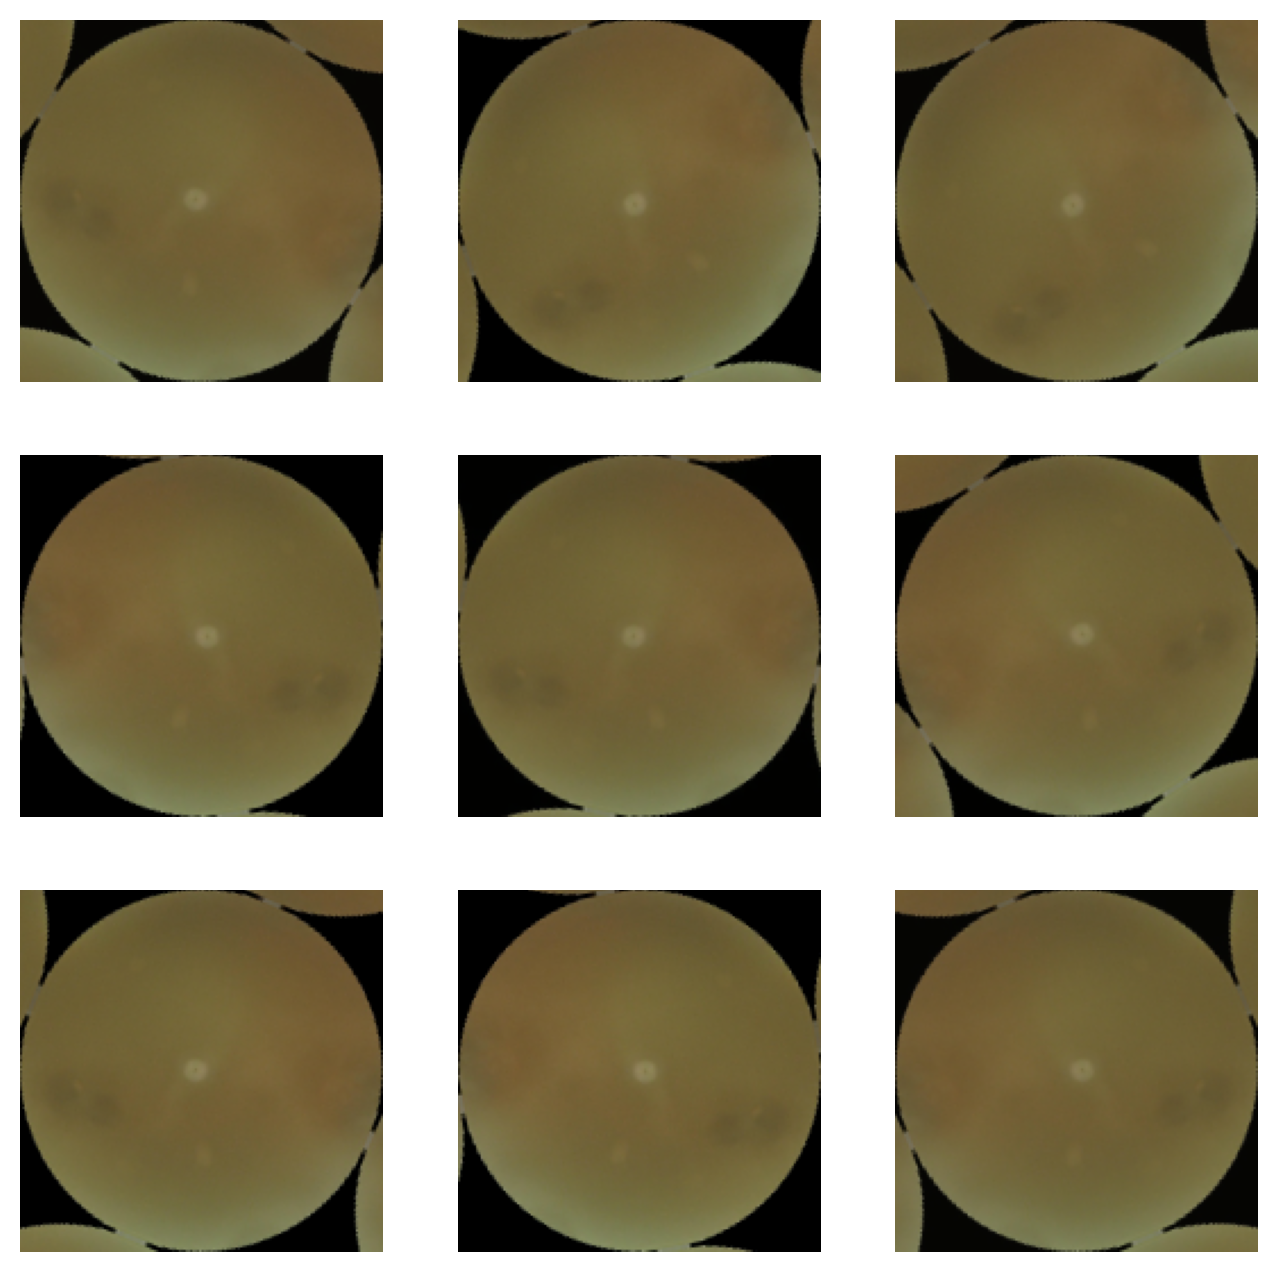

In [ ]:
augmented_img()

In [ ]:
import keras.backend as K # function to add F1 score as metric

def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
METRICS = [
      tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      f1_score
]

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
from tensorflow.python.keras import regularizers

## **ResNet-50 model with augmentation layers**



In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adamax, RMSprop, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
from tensorflow.keras import regularizers

In [ ]:
input_shape = (160, 160, 3)
base_model = tf.keras.applications.ResNet50(weights='imagenet',
                                            include_top=False,
                                            input_shape=input_shape,
                                            pooling = 'max')
base_model.trainable = True

94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
# Define a function to create the base model for ResNet-50
def ResNet50BaseWithAugmentation():

    # Input layer with data augmentation
    inputs = tf.keras.Input(shape=input_shape)
    x = data_augmentation(inputs)

    # Rescaling layer
    x = tf.keras.layers.Rescaling(1./255)(x)
    x = base_model(x, training = True)
    x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)

    # Add kernel and bias regularizers to the dense layer
    x = Dense(256, activation='relu',
              kernel_regularizer=regularizers.l2(0.016),
              bias_regularizer=regularizers.l1(0.006),
              activity_regularizer=regularizers.l1(0.006),
              )(x)

    x = Dropout(rate=0.4, seed=123)(x)
    output = Dense(4, activation='softmax')(x)
    model = tf.keras.Model(inputs=inputs, outputs=output)
    model.compile(optimizer=RMSprop(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=METRICS)

    return model

# Create the ResNet-50 base model with data augmentation layers
resnet_model_with_augmentation = ResNet50BaseWithAugmentation()



### **Fit model and run**

In [ ]:
# Assuming you have defined your train_ds dataset, you can check its shape as follows:
sample_batch = next(iter(train_ds))  # Get a single batch from the dataset
input_data, labels = sample_batch     # Unpack the batch into input data and labels

# Print the shape of input data and labels
print("Input data shape:", input_data.shape)
print("Labels shape:", labels.shape)


Input data shape: (32, 160, 160, 3)
Labels shape: (32, 4)


In [ ]:
# Assuming you have defined your val_ds dataset, you can check its shape as follows:
sample_batch = next(iter(val_ds))    # Get a single batch from the validation dataset
input_data, labels = sample_batch     # Unpack the batch into input data and labels

# Print the shape of input data and labels
print("Validation Input data shape:", input_data.shape)
print("Validation Labels shape:", labels.shape)


Validation Input data shape: (32, 160, 160, 3)
Validation Labels shape: (32, 4)


In [ ]:
# Train the ResNet-50 model with data augmentation, doing validation at the end of each epoch.
epochs = 200

resnet_callbacks = [
    ModelCheckpoint("drive/MyDrive/Colab Notebooks/ResNet50/ResNet50_ep{epoch}_val{val_loss:.3f}", save_best_only=True),
    EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.001, restore_best_weights=True),
    CSVLogger('drive/MyDrive/Colab Notebooks/ResNet50/ResNet50_history.csv'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, mode='min', min_lr=0.00001)
]

# Assuming you have train_ds and val_ds defined, you can train the model as follows:
resnet_history_with_augmentation = resnet_model_with_augmentation.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=resnet_callbacks)


Epoch 1/200
66/66 [==============================] - 60s 491ms/step - loss: 9.1694 - categorical_accuracy: 0.5460 - precision: 0.5850 - recall: 0.4862 - auc: 0.7718 - f1_score: 0.5254 - val_loss: 10.3297 - val_categorical_accuracy: 0.2690 - val_precision: 0.2699 - val_recall: 0.2224 - val_auc: 0.5299 - val_f1_score: 0.2426 - lr: 1.0000e-04
Epoch 2/200
66/66 [==============================] - 29s 438ms/step - loss: 8.0899 - categorical_accuracy: 0.8121 - precision: 0.8382 - recall: 0.7718 - auc: 0.9231 - f1_score: 0.7996 - val_loss: 10.1169 - val_categorical_accuracy: 0.2690 - val_precision: 0.2622 - val_recall: 0.2300 - val_auc: 0.4974 - val_f1_score: 0.2491 - lr: 1.0000e-04
Epoch 3/200
66/66 [==============================] - 28s 436ms/step - loss: 7.2291 - categorical_accuracy: 0.8828 - precision: 0.9100 - recall: 0.8539 - auc: 0.9508 - f1_score: 0.8751 - val_loss: 9.0541 - val_categorical_accuracy: 0.2557 - val_precision: 0.2550 - val_recall: 0.2529 - val_auc: 0.5159 - val_f1_score:

## **Learning Curves**

In [ ]:
import pandas as pd
history = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ResNet50/ResNet50_history.csv')
history.head(3)

epoch       auc  categorical_accuracy  f1_score      loss  precision  \
0      0  0.771829              0.546015  0.525422  9.169417   0.585046   
1      1  0.923073              0.812144  0.799574  8.089858   0.838228   
2      2  0.950844              0.882827  0.875121  7.229128   0.910010   

     recall   val_auc  val_categorical_accuracy  val_f1_score   val_loss  \
0  0.486243  0.529851                  0.269011      0.242598  10.329677   
1  0.771822  0.497352                  0.269011      0.249102  10.116941   
2  0.853890  0.515948                  0.255703      0.256614   9.054143   

   val_precision  val_recall  
0       0.269896    0.222433  
1       0.262189    0.230038  
2       0.255034    0.252852

In [ ]:
acc = history['categorical_accuracy']
val_acc = history['val_categorical_accuracy']

loss = history['loss']
val_loss = history['val_loss']

In [ ]:
def learning_curves(acc,val_acc,loss,val_loss):
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim([min(plt.ylim()),max(plt.ylim())])
  plt.xlim([0,max(plt.xlim())])
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy')
  plt.ylim([min(plt.ylim()),max(plt.ylim())])
  plt.xlim([0,max(plt.xlim())])
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()
  return plt.show()

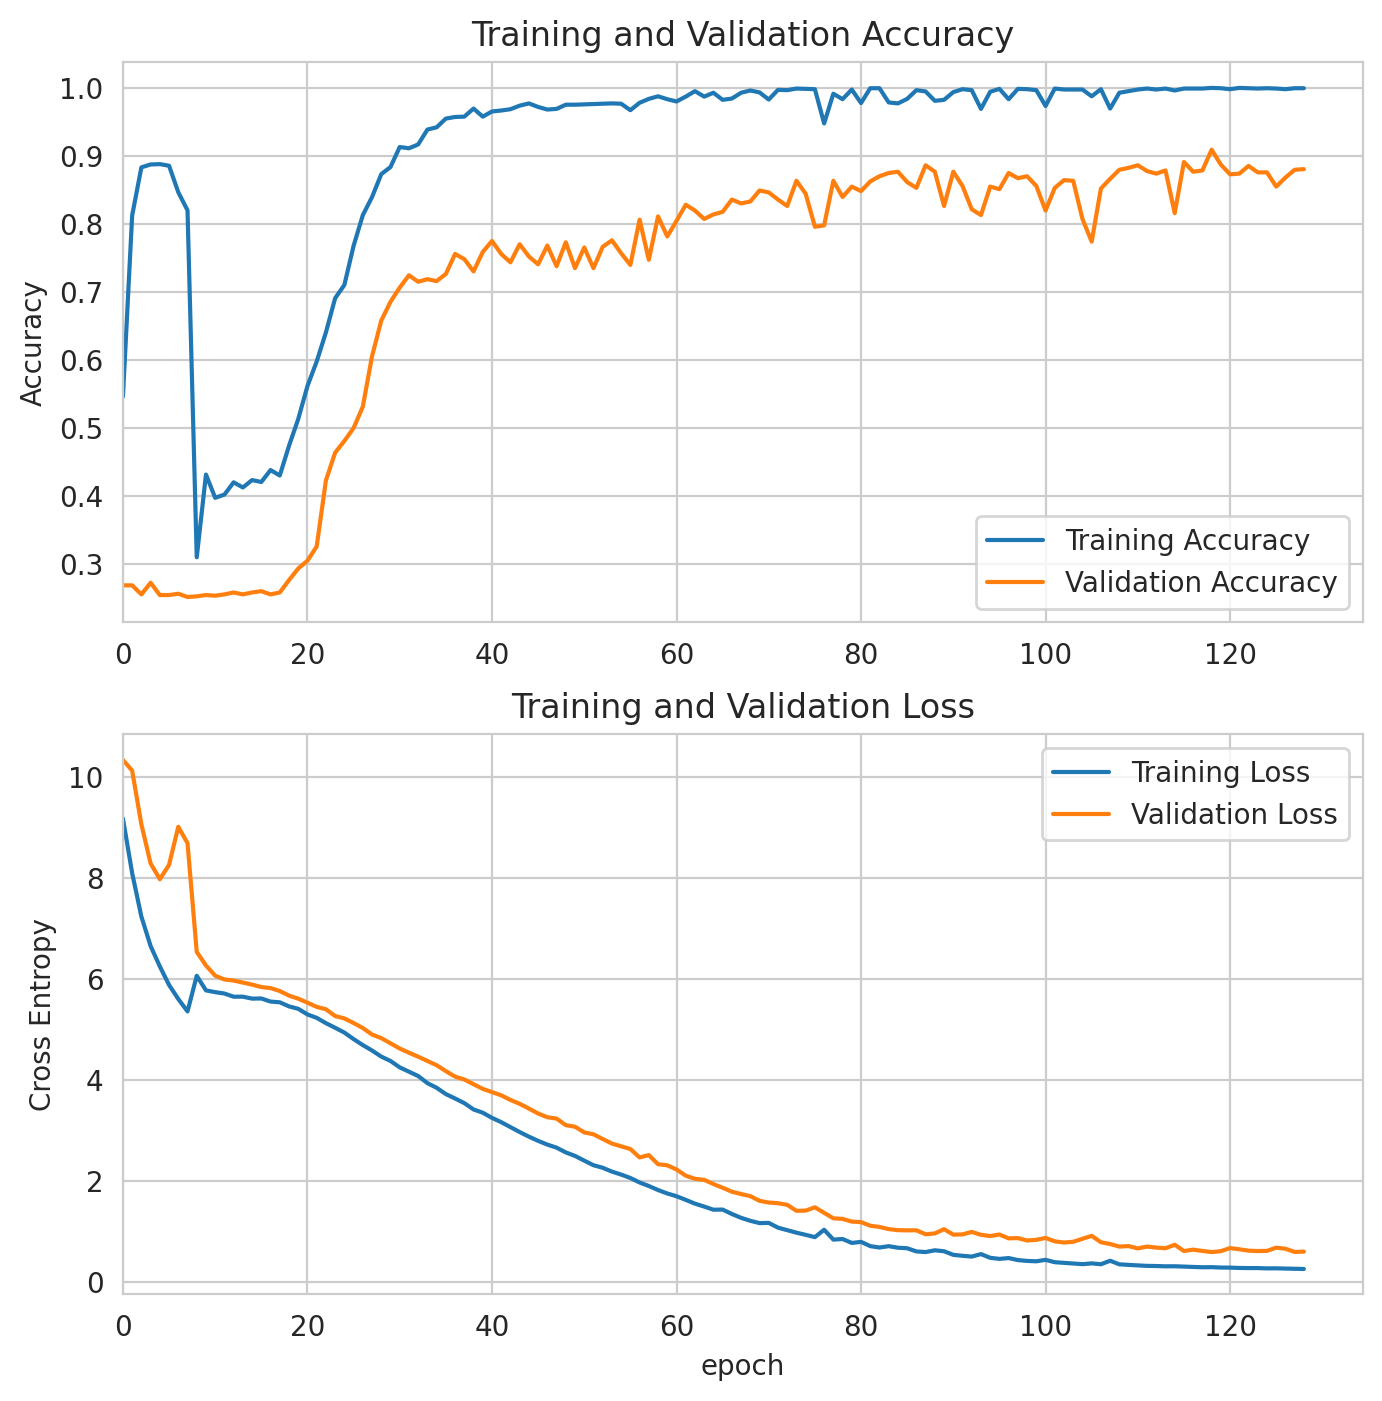

In [ ]:
learning_curves(acc,val_acc,loss,val_loss)

In [ ]:
def metrics(epoch_num):
  val_auc = history.loc[history['epoch']==epoch_num, ['val_auc']].values[0][0]
  auc = history.loc[history['epoch']==epoch_num, ['auc']].values[0][0]
  auc_diff = (auc - val_auc)*100 / auc
  print('AUC percentage difference is:', abs(auc_diff), '%')

  val_acc = history.loc[history['epoch']==epoch_num, ['val_categorical_accuracy']].values[0][0]
  acc = history.loc[history['epoch']==epoch_num, ['categorical_accuracy']].values[0][0]
  acc_diff = (acc - val_acc)*100 / acc
  print()
  print('Accuracy percentage difference is:', abs(acc_diff), '%')

In [ ]:
# check for generalisation using epoch 119
metrics(epoch_num=118)

AUC percentage difference is: 1.4458165007245507 %

Accuracy percentage difference is: 9.082346343669261 %


Adding data augmentation layers to the EfficientNet model resulted in model requiring more epochs to learn, but achieve slightly better generalisation. Using model at **epoch 47**, the validation metrics are as follows:

| Name               |   Scores   |
|:-------------------|:----------:|
|AUC                 |0.9916225672|
|Categorical Accuracy|0.9420152307|
|F1 score            |0.943136692|
|Loss                |0.31233868|
|Precision           |0.9455587268|
|Recall              |0.9410646558|


### **Evaluation**

In [ ]:
# choose model for evaluation
# load model
model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/ResNet50/ResNet50_ep119_val0.592",
                                   custom_objects={'f1_score': f1_score})

### **Confusion matrix**


In [ ]:
# get predictions for confusion matrix
# class_names = train_ds.class_names # from previous cell
print(class_names)

print('===== test_ds predictions =====')
test_preds = model.predict(test_ds, verbose=1) # get test_ds predictions
# sample test_ds predictions
print(test_preds[2])
for array in [test_preds[2]]:
  print(f'{class_names[0]} probability is: {array[0]:.4f}')
  print(f'{class_names[1]} probability is: {array[1]:.4f}')
  print(f'{class_names[2]} probability is: {array[2]:.4f}')
  print(f'{class_names[3]} probability is: {array[3]:.4f}')
  break

print() #gap

print('===== train_ds predictions =====')
train_preds = model.predict(train_ds, verbose=1) # get train_ds predictions
# sample train_ds predictions
print(train_preds[:1])
for array in train_preds:
  print(f'{class_names[0]} probability is: {array[0]:.4f}')
  print(f'{class_names[1]} probability is: {array[1]:.4f}')
  print(f'{class_names[2]} probability is: {array[2]:.4f}')
  print(f'{class_names[3]} probability is: {array[3]:.4f}')
  break

print() #gap

print('===== val_ds predictions =====')
val_preds = model.predict(val_ds, verbose=1) # get val_ds predictions
# sample val_ds predictions
print(val_preds[:1])
for array in val_preds:
  print(f'{class_names[0]} probability is: {array[0]:.4f}')
  print(f'{class_names[1]} probability is: {array[1]:.4f}')
  print(f'{class_names[2]} probability is: {array[2]:.4f}')
  print(f'{class_names[3]} probability is: {array[3]:.4f}')
  break

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']
===== test_ds predictions =====
34/34 [==============================] - 3s 47ms/step
[0.88805324 0.02912895 0.0496354  0.03318233]
cataract probability is: 0.8881
diabetic_retinopathy probability is: 0.0291
glaucoma probability is: 0.0496
normal probability is: 0.0332

===== train_ds predictions =====
66/66 [==============================] - 3s 41ms/step
[[0.9316119  0.01642011 0.03005082 0.02191716]]
cataract probability is: 0.9316
diabetic_retinopathy probability is: 0.0164
glaucoma probability is: 0.0301
normal probability is: 0.0219

===== val_ds predictions =====
33/33 [==============================] - 1s 40ms/step
[[0.5150958  0.18450765 0.13730112 0.16309546]]
cataract probability is: 0.5151
diabetic_retinopathy probability is: 0.1845
glaucoma probability is: 0.1373
normal probability is: 0.1631


In [ ]:
y_pred_probs = np.max(test_preds, axis=-1) # store probabilities of predictions for later use

In [ ]:
y_proba = test_preds # store all probabilities for later use in ROC curve
print(y_proba[:, 0][:3]) # predicted probability of cataract

[0.9249678  0.55735344 0.88805324]


#####**OHE predictions:**

In [ ]:
# convert prediction probabilities into ohe
# for confusion matrix

# for test_ds
idx = np.argmax(test_preds, axis=-1)
test_preds = np.zeros( test_preds.shape )
test_preds[ np.arange(test_preds.shape[0]), idx] = 1

#print(train_preds.argmax(axis=1))
#print(train_labels.argmax(axis=1))

# for train_ds
idx = np.argmax(train_preds, axis=-1)
train_preds = np.zeros( train_preds.shape )
train_preds[ np.arange(train_preds.shape[0]), idx] = 1

# for val_ds
idx = np.argmax(val_preds, axis=-1)
val_preds = np.zeros( val_preds.shape )
val_preds[ np.arange(val_preds.shape[0]), idx] = 1

print('Predicted test_ds labels:', test_preds[:5])
print() # gap
print('Predicted train_ds labels:', train_preds[:5])
print() # gap
print('Predicted val_ds labels:', val_preds[:5])

Predicted test_ds labels: [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

Predicted train_ds labels: [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

Predicted val_ds labels: [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


##### **Extracting true labels:**

In [ ]:
# extract true labels and images from test_ds
test_labels = np.concatenate([y for x, y in test_ds], axis=0)
test_images = np.concatenate([x for x, y in test_ds], axis=0)

# extract true labels and images from train_ds
train_labels = np.concatenate([y for x, y in train_ds], axis=0)
train_images = np.concatenate([x for x, y in train_ds], axis=0)

# extract true labels and images from val_ds
val_labels = np.concatenate([y for x, y in val_ds], axis=0)
val_images = np.concatenate([x for x, y in val_ds], axis=0)

print('===== Test set true labels =====')
print(test_labels[:5])
print() # gap
print('===== Train set true labels =====')
print(train_labels[:5])
print() # gap
print('===== Validation set true labels =====')
print(val_labels[:5])

===== Test set true labels =====
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

===== Train set true labels =====
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

===== Validation set true labels =====
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


##### **Plot confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
# Creating a confusion matrix for test_ds predictions
test_cm = confusion_matrix(test_labels.argmax(axis=1), test_preds.argmax(axis=1))
# Creating a confusion matrix for train_ds predictions
train_cm = confusion_matrix(train_labels.argmax(axis=1), train_preds.argmax(axis=1))
# Creating a confusion matrix for val_ds predictions
val_cm = confusion_matrix(val_labels.argmax(axis=1), val_preds.argmax(axis=1))

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
test_cm_df = pd.DataFrame(test_cm,
                          index = class_names,
                          columns = class_names)
train_cm_df = pd.DataFrame(train_cm,
                           index = class_names,
                           columns = class_names)
val_cm_df = pd.DataFrame(val_cm,
                         index = class_names,
                         columns = class_names)

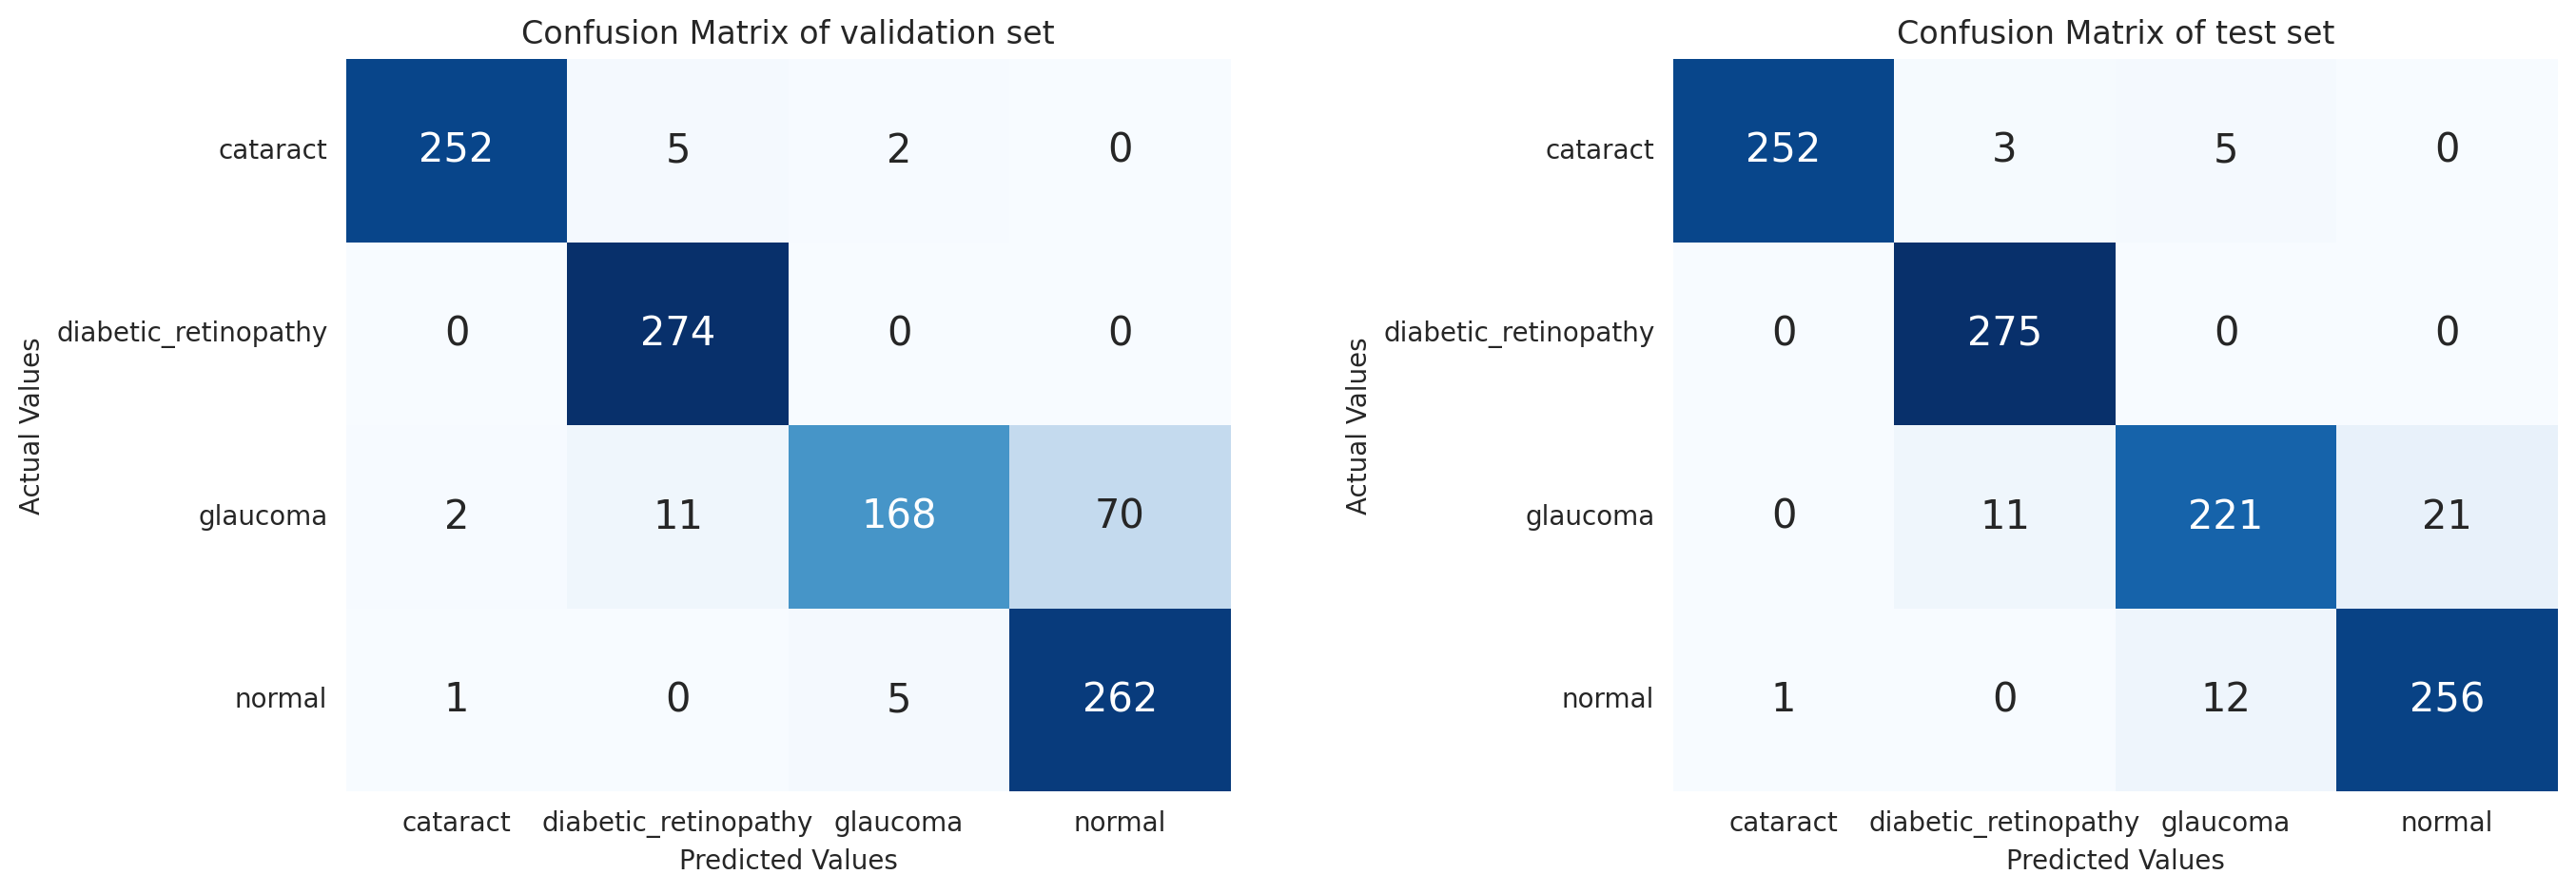

In [ ]:
#Plotting confusion matrices using heatmap
fig, axes = plt.subplots(1, 2, figsize=(15,5))
#sns.heatmap(train_cm_df, annot=True, cbar=False, cmap='Blues', vmin=0, fmt='.3g', annot_kws={"size": 15}, ax=axes[0])
#axes[0].set_title('Confusion Matrix of train set')
#axes[0].set_ylabel('Actual Values')
#axes[0].set_xlabel('Predicted Values')

sns.heatmap(val_cm_df, annot=True, cbar=False, cmap='Blues', vmin=0, fmt='.3g', annot_kws={"size": 15}, ax=axes[0])
axes[0].set_title('Confusion Matrix of validation set')
axes[0].set_ylabel('Actual Values')
axes[0].set_xlabel('Predicted Values')

sns.heatmap(test_cm_df, annot=True, cbar=False, cmap='Blues', vmin=0, fmt='.3g', annot_kws={"size": 15}, ax=axes[1])
axes[1].set_title('Confusion Matrix of test set')
axes[1].set_ylabel('Actual Values')
axes[1].set_xlabel('Predicted Values')

plt.subplots_adjust(wspace=0.5)

plt.show()

### **Classification report**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, test_preds, target_names=class_names, digits= 4))

                      precision    recall  f1-score   support

            cataract     0.9960    0.9692    0.9825       260
diabetic_retinopathy     0.9516    1.0000    0.9752       275
            glaucoma     0.9286    0.8735    0.9002       253
              normal     0.9242    0.9517    0.9377       269

           micro avg     0.9499    0.9499    0.9499      1057
           macro avg     0.9501    0.9486    0.9489      1057
        weighted avg     0.9500    0.9499    0.9495      1057
         samples avg     0.9499    0.9499    0.9499      1057



### **Misclassified test images**

In [ ]:
# extract test file names from test_ds
# this cannot do with tensorflow datasets that are prefetched autotuned
test_filenames = test_ds.file_paths

In [ ]:
len(test_filenames)

1057

In [ ]:
class_names

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

In [ ]:
# convert OHE to interger version of class_names for easier comparison
y_true = tf.argmax(test_labels, axis=1).numpy() # tensor object not iterable, use numpy to convert to list
y_pred = tf.argmax(test_preds, axis=1).numpy()
print('First 5 true labels:', y_true[:5])
print('First 5 predictions:', y_pred[:5])

error_list = []

for a, b, c, d in zip(y_true, y_pred, y_pred_probs, test_filenames):
  if a != b:
    error_list.append((class_names[a],class_names[b],c,d))

First 5 true labels: [0 0 0 0 0]
First 5 predictions: [0 0 0 0 0]


In [ ]:
len(error_list)

53

In [ ]:
print('Prediction accuracy on test data:', 100 - (len(error_list)*100/len(test_filenames)), '%')

Prediction accuracy on test data: 94.98580889309366 %


### **Looking into specific images that were misclassified**

In [ ]:
error_list[:5] # check for duplicates

[('cataract',
  'glaucoma',
  0.35148957,
  './work_directory/test/cataract/2206_left.jpg'),
 ('cataract',
  'glaucoma',
  0.36346564,
  './work_directory/test/cataract/2235_left.jpg'),
 ('cataract',
  'glaucoma',
  0.3463764,
  './work_directory/test/cataract/2237_right.jpg'),
 ('cataract',
  'glaucoma',
  0.3769655,
  './work_directory/test/cataract/_174_1289707.jpg'),
 ('cataract',
  'diabetic_retinopathy',
  0.31885612,
  './work_directory/test/cataract/_2_1600849.jpg')]

In [ ]:
def print_in_color(txt_msg,fore_tupple=(0,255,255),back_tupple=(100,100,100)):
    #prints the text_msg in the foreground color specified by fore_tupple with the background specified by back_tupple
    #text_msg is the text, fore_tupple is foregroud color tupple (r,g,b), back_tupple is background tupple (r,g,b)
    # default parameter print in cyan foreground and gray background
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m'
    print(msg .format(mat), flush=True)
    print('\33[0m', flush=True) # returns default print color to back to black
    return

# example default print
msg='test of default colors'
print_in_color(msg)

test of default colors



In [ ]:
import re

print ('Below is a list of test files that were misclassified \n')
msg='{0:^10}{1:^30s}{2:^20s}{3:^20s}{4:^15s}'.format('No.','Test File','True Label','Predicted as','Probability')
print_in_color(msg)

for i, (a, b, c, d) in enumerate(error_list):
  x = re.split('./work_directory/test/', d)[-1]
  print('{0:^10}{1:^30s}{2:^20s}{3:^20s}  {4:.4f}'.format(i+1,x,a,b,c))

Below is a list of test files that were misclassified 

   No.              Test File                True Label         Predicted as      Probability  

    1         cataract/2206_left.jpg          cataract            glaucoma        0.3515
    2         cataract/2235_left.jpg          cataract            glaucoma        0.3635
    3        cataract/2237_right.jpg          cataract            glaucoma        0.3464
    4       cataract/_174_1289707.jpg         cataract            glaucoma        0.3770
    5        cataract/_2_1600849.jpg          cataract      diabetic_retinopathy  0.3189
    6        cataract/_34_2290989.jpg         cataract      diabetic_retinopathy  0.3880
    7       cataract/cataract_007.png         cataract            glaucoma        0.2928
    8       cataract/cataract_012.png         cataract      diabetic_retinopathy  0.3060
    9         glaucoma/1209_left.jpg          glaucoma      diabetic_retinopathy  0.8184
    10       glaucoma/1209_right.jpg          

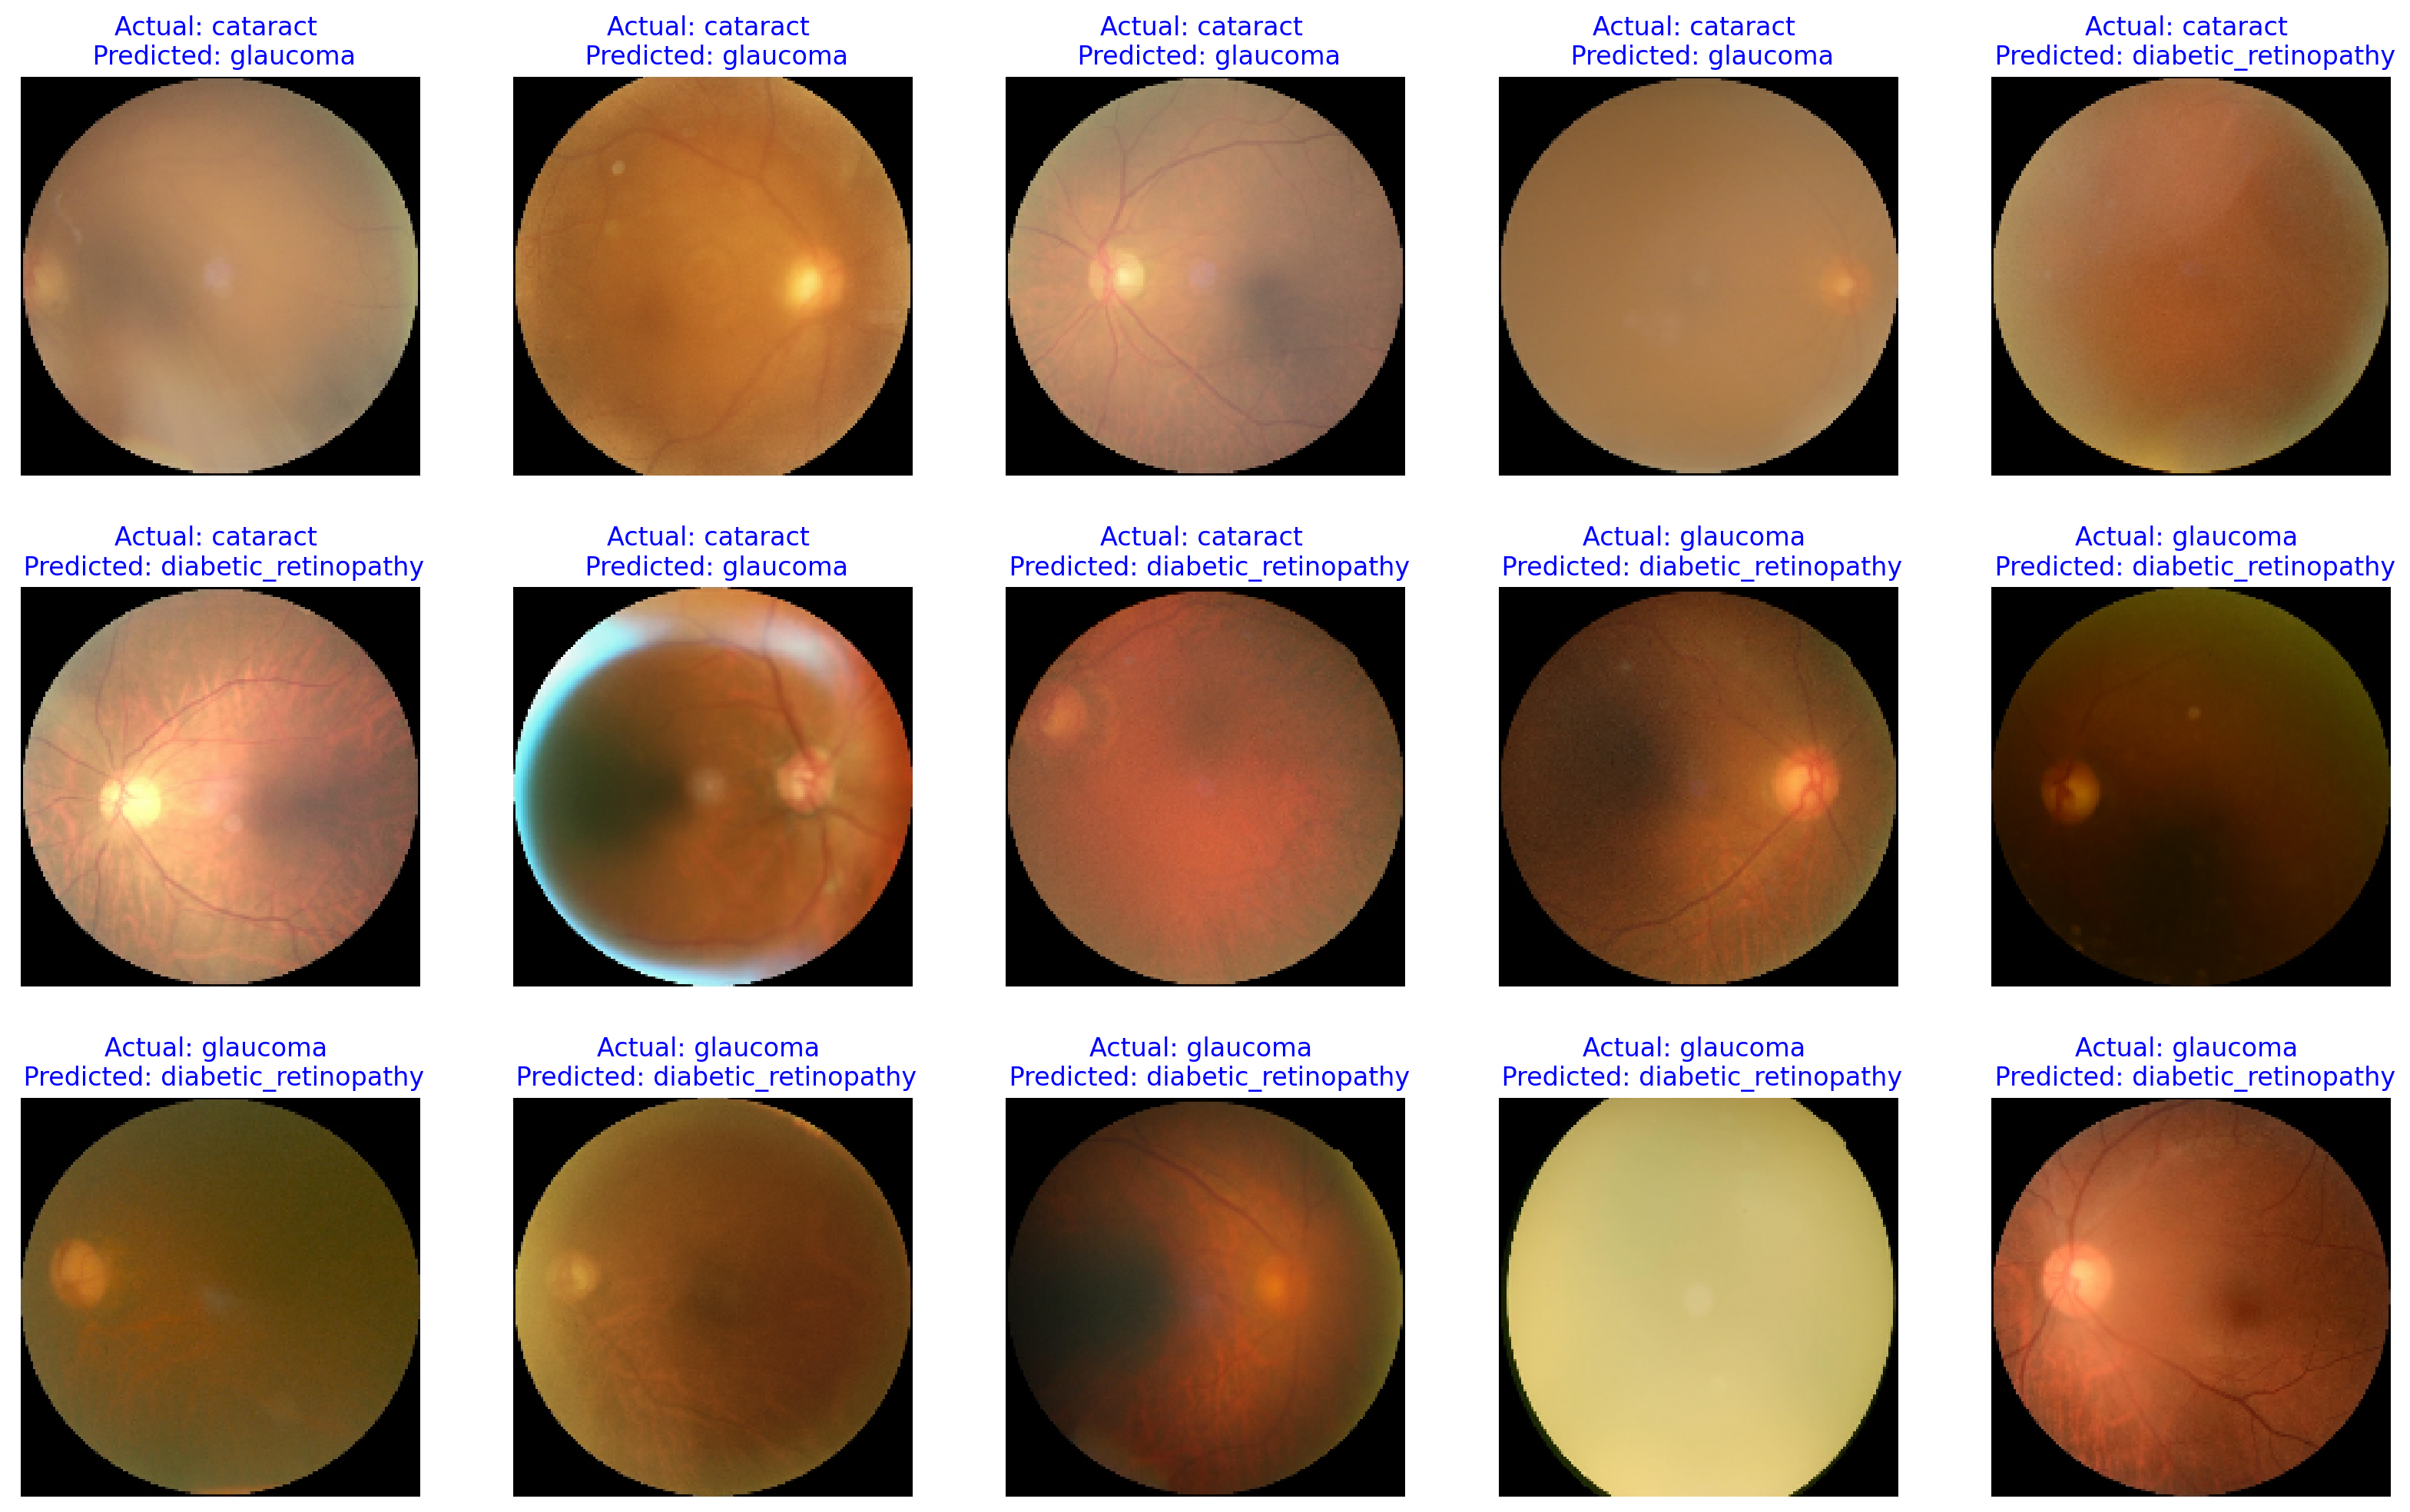

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a list called error_list containing (actual, predicted) pairs
# and test_images containing your test images

fig, axes = plt.subplots(3, 5, figsize=(20, 12)) # 3 rows, 5 cols

def axes_img(r, c, i):
    if i < len(error_list):
        axes[r, c].imshow(test_images[i].astype('uint8'))
        axes[r, c].axis('off')
        axes[r, c].set_title(f'Actual: {error_list[i][0]} \n Predicted: {error_list[i][1]}', color='blue')

# Loop through rows and columns to display images
for r in range(3):
    for c in range(5):
        i = r * 5 + c
        axes_img(r, c, i)

plt.subplots_adjust(hspace=0.28) # add space between rows
plt.show()


## **ResNet-50 model with augmentation layers -- Another**

In [ ]:
input_shape = (160, 160, 3)
base_model = tf.keras.applications.ResNet50(weights='imagenet',
                                            include_top=False,
                                            input_shape=input_shape,
                                            pooling = 'max')
base_model.trainable = True

In [ ]:
# Define a function to create the base model for ResNet-50
def ResNet50BaseWithAugmentation():

    # Input layer with data augmentation
    inputs = tf.keras.Input(shape=input_shape)
    x = data_augmentation(inputs)

    # Rescaling layer
    x = tf.keras.layers.Rescaling(1./255)(x)
    x = base_model(x, training = True)
    x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)

    # Add kernel and bias regularizers to the dense layer
    x = Dense(256, activation='relu',
              kernel_regularizer=regularizers.l2(0.001),
              bias_regularizer=regularizers.l1(0.001),
              activity_regularizer=regularizers.l1(0.001),
              )(x)

    x = Dropout(rate=0.5, seed=123)(x)
    output = Dense(4, activation='softmax')(x)
    model = tf.keras.Model(inputs=inputs, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=METRICS)

    return model

# Create the ResNet-50 base model with data augmentation layers
resnet_model_with_augmentation = ResNet50BaseWithAugmentation()



In [ ]:
# Train the ResNet-50 model with data augmentation, doing validation at the end of each epoch.
epochs = 200

resnet_callbacks = [
    ModelCheckpoint("drive/MyDrive/Colab Notebooks/ResNet50_1/ResNet50_ep{epoch}_val{val_loss:.3f}", save_best_only=True),
    EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.001, restore_best_weights=True),
    CSVLogger('drive/MyDrive/Colab Notebooks/ResNet50_1/ResNet50_history.csv'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, mode='min', min_lr=0.00001)
]

# Assuming you have train_ds and val_ds defined, you can train the model as follows:
resnet_history_with_augmentation = resnet_model_with_augmentation.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=resnet_callbacks)


Epoch 1/200
66/66 [==============================] - 66s 499ms/step - loss: 2.9747 - categorical_accuracy: 0.4620 - precision: 0.4851 - recall: 0.3956 - auc: 0.6815 - f1_score: 0.2140 - val_loss: 2.7360 - val_categorical_accuracy: 0.2975 - val_precision: 0.3075 - val_recall: 0.2262 - val_auc: 0.5466 - val_f1_score: 0.2619 - lr: 1.0000e-04
Epoch 2/200
66/66 [==============================] - 31s 470ms/step - loss: 2.7006 - categorical_accuracy: 0.2974 - precision: 0.3087 - recall: 0.2377 - auc: 0.5421 - f1_score: 0.2679 - val_loss: 2.2319 - val_categorical_accuracy: 0.3527 - val_precision: 0.4044 - val_recall: 0.2595 - val_auc: 0.6108 - val_f1_score: 0.3132 - lr: 1.0000e-04
Epoch 3/200
66/66 [==============================] - 30s 458ms/step - loss: 2.5510 - categorical_accuracy: 0.3212 - precision: 0.3421 - recall: 0.2604 - auc: 0.5785 - f1_score: 0.2928 - val_loss: 1.9198 - val_categorical_accuracy: 0.4297 - val_precision: 0.5129 - val_recall: 0.3203 - val_auc: 0.7011 - val_f1_score: 0

**Best: (Epoch 72/200)**


---


66/66 [==============================] - 31s 469ms/step - loss: 0.3494 - **categorical_accuracy: 0.9995** - precision: 0.9995 - recall: 0.9991 - auc: 1.0000 - f1_score: 0.9993 - val_loss: 0.4257 - **val_categorical_accuracy: 0.9838** - val_precision: 0.9866 - val_recall: 0.9762 - val_auc: 0.9996 - val_f1_score: 0.9806 - lr: 1.0000e-04


**loss:** *The loss function measures how well the model's predictions match the ground truth labels. A lower loss indicates a better model*.

**categorical_accuracy:** *The categorical accuracy measures the percentage of predictions that the model got correct*.

**precision:** *The precision measures the percentage of positive predictions that the model made that were actually correct*.

**recall:** *The recall measures the percentage of actual positive labels that the model predicted correctly*.

**auc:** *The AUC (area under the ROC curve) is a measure of the model's ability to distinguish between positive and negative labels. A higher AUC indicates a better model*.

**f1_score:** *The f1_score is a harmonic mean of precision and recall. It is a good measure of the model's overall performance*.

## **Learning Curves**

In [ ]:
import pandas as pd
history = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ResNet50_1/ResNet50_history.csv')
history.head(3)

epoch       auc  categorical_accuracy  f1_score      loss  precision  \
0      0  0.681495              0.462025  0.213979  2.974677   0.485060   
1      1  0.542117              0.297438  0.267943  2.700575   0.308688   
2      2  0.578521              0.321157  0.292770  2.551023   0.342056   

     recall   val_auc  val_categorical_accuracy  val_f1_score  val_loss  \
0  0.395570  0.546642                  0.297529      0.261932  2.736042   
1  0.237666  0.610814                  0.352662      0.313182  2.231924   
2  0.260436  0.701107                  0.429658      0.387213  1.919754   

   val_precision  val_recall  
0       0.307494    0.226236  
1       0.404444    0.259506  
2       0.512938    0.320342

In [ ]:
acc = history['categorical_accuracy']
val_acc = history['val_categorical_accuracy']

loss = history['loss']
val_loss = history['val_loss']

In [ ]:
def learning_curves(acc,val_acc,loss,val_loss):
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim([min(plt.ylim()),max(plt.ylim())])
  plt.xlim([0,max(plt.xlim())])
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy')
  plt.ylim([min(plt.ylim()),max(plt.ylim())])
  plt.xlim([0,max(plt.xlim())])
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()
  return plt.show()

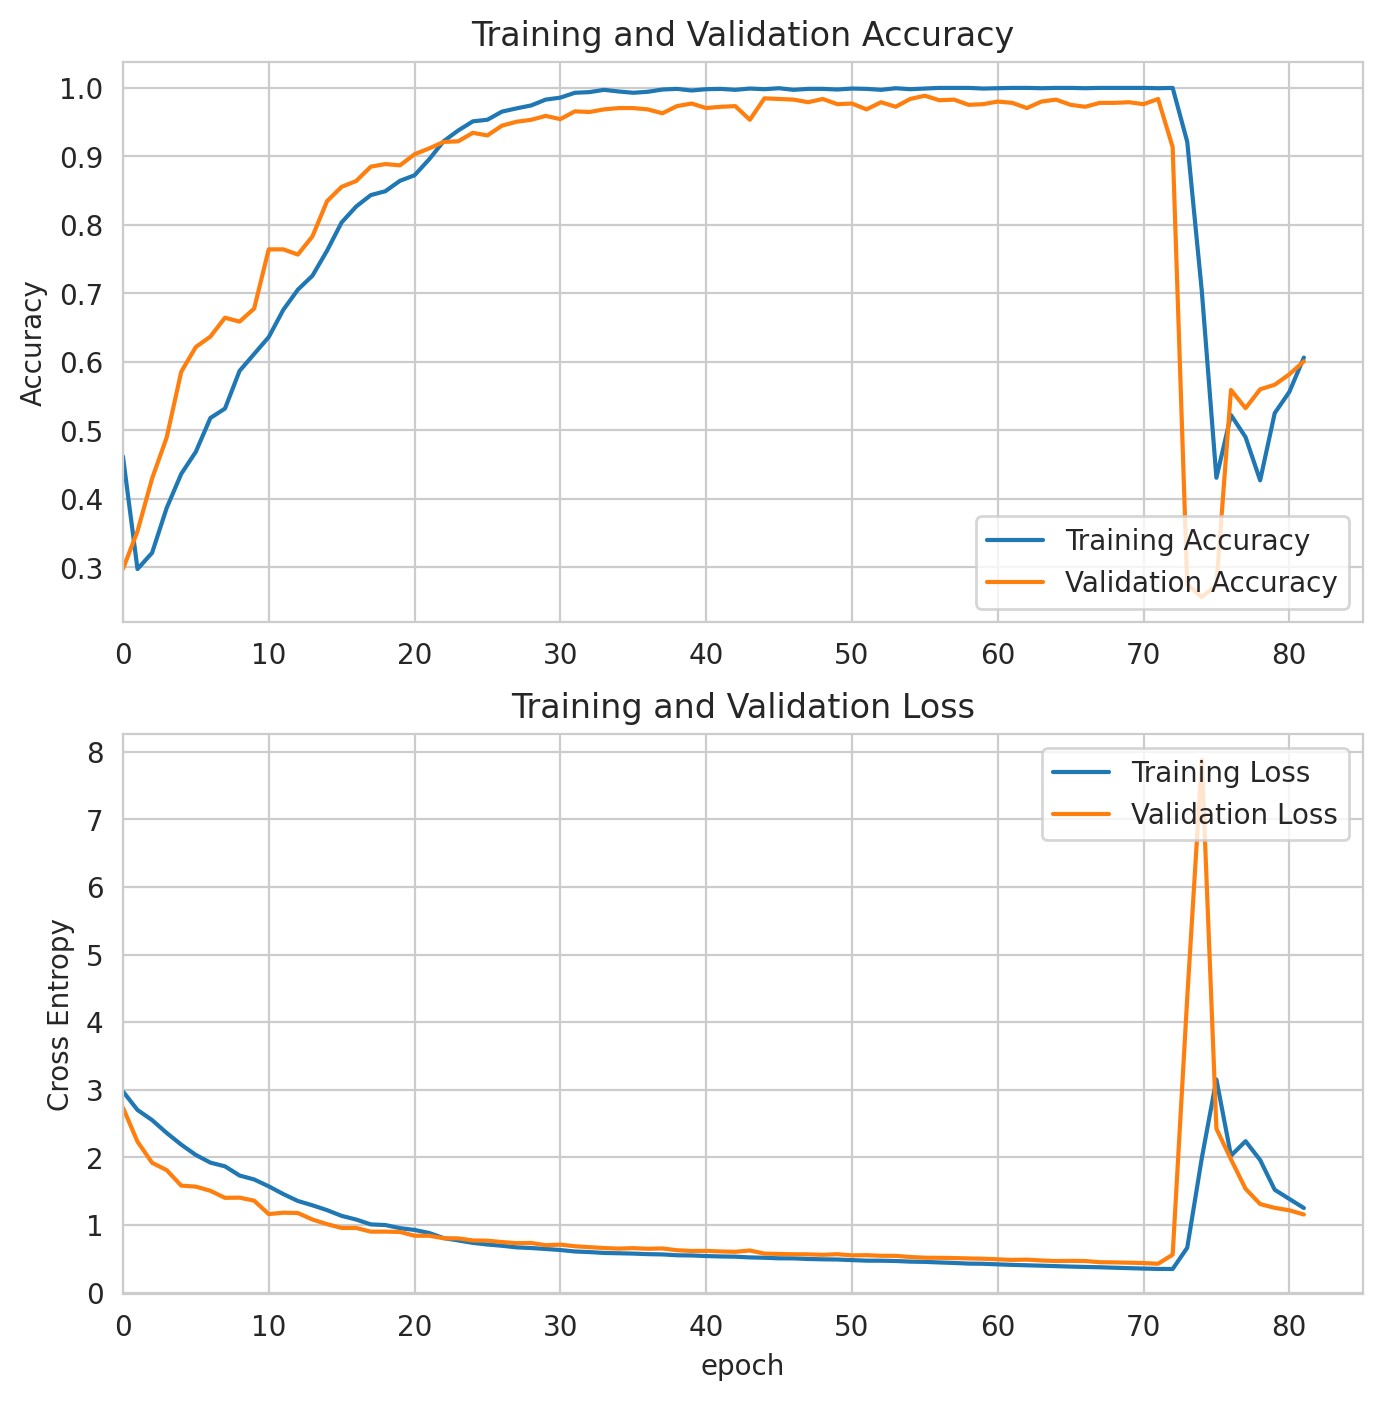

In [ ]:
learning_curves(acc,val_acc,loss,val_loss)

In [ ]:
def metrics(epoch_num):
  val_auc = history.loc[history['epoch']==epoch_num, ['val_auc']].values[0][0]
  auc = history.loc[history['epoch']==epoch_num, ['auc']].values[0][0]
  auc_diff = (auc - val_auc)*100 / auc
  print('AUC percentage difference is:', abs(auc_diff), '%')

  val_acc = history.loc[history['epoch']==epoch_num, ['val_categorical_accuracy']].values[0][0]
  acc = history.loc[history['epoch']==epoch_num, ['categorical_accuracy']].values[0][0]
  acc_diff = (acc - val_acc)*100 / acc
  print()
  print('Accuracy percentage difference is:', abs(acc_diff), '%')

In [ ]:
# check for generalisation using epoch 72
metrics(epoch_num=71)

AUC percentage difference is: 0.03979206796741591 %

Accuracy percentage difference is: 1.569276444388692 %


Adding data augmentation layers to the **ResNet50** model resulted in model requiring more epochs to learn, but achieve slightly better generalisation. Using model at **epoch 72**, the validation metrics are as follows:

| **Name**               |   **Scores**   |
|:-------------------|:----------:|
|**AUC**                 |1.0000|
|**Categorical Accuracy**|0.9995|
|**F1 score**            |0.9993|
|**Loss**                |0.3494|
|**Precision**           |0.9995|
|**Recall**              |0.9991|


### **Evaluation**


In [ ]:
# choose model for evaluation
# load model
model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/ResNet50_1/ResNet50_ep72_val0.426",
                                   custom_objects={'f1_score': f1_score})

### **Confusion matrix**


In [ ]:
# get predictions for confusion matrix
# class_names = train_ds.class_names # from previous cell
print(class_names)

print('===== test_ds predictions =====')
test_preds = model.predict(test_ds, verbose=1) # get test_ds predictions
# sample test_ds predictions
print(test_preds[2])
for array in [test_preds[2]]:
  print(f'{class_names[0]} probability is: {array[0]:.4f}')
  print(f'{class_names[1]} probability is: {array[1]:.4f}')
  print(f'{class_names[2]} probability is: {array[2]:.4f}')
  print(f'{class_names[3]} probability is: {array[3]:.4f}')
  break

print() #gap

print('===== train_ds predictions =====')
train_preds = model.predict(train_ds, verbose=1) # get train_ds predictions
# sample train_ds predictions
print(train_preds[:1])
for array in train_preds:
  print(f'{class_names[0]} probability is: {array[0]:.4f}')
  print(f'{class_names[1]} probability is: {array[1]:.4f}')
  print(f'{class_names[2]} probability is: {array[2]:.4f}')
  print(f'{class_names[3]} probability is: {array[3]:.4f}')
  break

print() #gap

print('===== val_ds predictions =====')
val_preds = model.predict(val_ds, verbose=1) # get val_ds predictions
# sample val_ds predictions
print(val_preds[:1])
for array in val_preds:
  print(f'{class_names[0]} probability is: {array[0]:.4f}')
  print(f'{class_names[1]} probability is: {array[1]:.4f}')
  print(f'{class_names[2]} probability is: {array[2]:.4f}')
  print(f'{class_names[3]} probability is: {array[3]:.4f}')
  break

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']
===== test_ds predictions =====
34/34 [==============================] - 2s 42ms/step
[0.9037156  0.03944503 0.02080521 0.03603413]
cataract probability is: 0.9037
diabetic_retinopathy probability is: 0.0394
glaucoma probability is: 0.0208
normal probability is: 0.0360

===== train_ds predictions =====
66/66 [==============================] - 3s 44ms/step
[[0.9118849  0.02359841 0.02993219 0.03458457]]
cataract probability is: 0.9119
diabetic_retinopathy probability is: 0.0236
glaucoma probability is: 0.0299
normal probability is: 0.0346

===== val_ds predictions =====
33/33 [==============================] - 1s 39ms/step
[[0.98505384 0.00116844 0.00413961 0.00963817]]
cataract probability is: 0.9851
diabetic_retinopathy probability is: 0.0012
glaucoma probability is: 0.0041
normal probability is: 0.0096


In [ ]:
y_pred_probs = np.max(test_preds, axis=-1) # store probabilities of predictions for later use

In [ ]:
y_proba = test_preds # store all probabilities for later use in ROC curve
print(y_proba[:, 0][:3]) # predicted probability of cataract

[0.78442734 0.9080036  0.9037156 ]


#####**OHE predictions:**

In [ ]:
# convert prediction probabilities into ohe
# for confusion matrix

# for test_ds
idx = np.argmax(test_preds, axis=-1)
test_preds = np.zeros( test_preds.shape )
test_preds[ np.arange(test_preds.shape[0]), idx] = 1

#print(train_preds.argmax(axis=1))
#print(train_labels.argmax(axis=1))

# for train_ds
idx = np.argmax(train_preds, axis=-1)
train_preds = np.zeros( train_preds.shape )
train_preds[ np.arange(train_preds.shape[0]), idx] = 1

# for val_ds
idx = np.argmax(val_preds, axis=-1)
val_preds = np.zeros( val_preds.shape )
val_preds[ np.arange(val_preds.shape[0]), idx] = 1

print('Predicted test_ds labels:', test_preds[:5])
print() # gap
print('Predicted train_ds labels:', train_preds[:5])
print() # gap
print('Predicted val_ds labels:', val_preds[:5])

Predicted test_ds labels: [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

Predicted train_ds labels: [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

Predicted val_ds labels: [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


##### **Extracting true labels:**

In [ ]:
# extract true labels and images from test_ds
test_labels = np.concatenate([y for x, y in test_ds], axis=0)
test_images = np.concatenate([x for x, y in test_ds], axis=0)

# extract true labels and images from train_ds
train_labels = np.concatenate([y for x, y in train_ds], axis=0)
train_images = np.concatenate([x for x, y in train_ds], axis=0)

# extract true labels and images from val_ds
val_labels = np.concatenate([y for x, y in val_ds], axis=0)
val_images = np.concatenate([x for x, y in val_ds], axis=0)

print('===== Test set true labels =====')
print(test_labels[:5])
print() # gap
print('===== Train set true labels =====')
print(train_labels[:5])
print() # gap
print('===== Validation set true labels =====')
print(val_labels[:5])

===== Test set true labels =====
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

===== Train set true labels =====
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

===== Validation set true labels =====
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


##### **Plot confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
# Creating a confusion matrix for test_ds predictions
test_cm = confusion_matrix(test_labels.argmax(axis=1), test_preds.argmax(axis=1))
# Creating a confusion matrix for train_ds predictions
train_cm = confusion_matrix(train_labels.argmax(axis=1), train_preds.argmax(axis=1))
# Creating a confusion matrix for val_ds predictions
val_cm = confusion_matrix(val_labels.argmax(axis=1), val_preds.argmax(axis=1))

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
test_cm_df = pd.DataFrame(test_cm,
                          index = class_names,
                          columns = class_names)
train_cm_df = pd.DataFrame(train_cm,
                           index = class_names,
                           columns = class_names)
val_cm_df = pd.DataFrame(val_cm,
                         index = class_names,
                         columns = class_names)

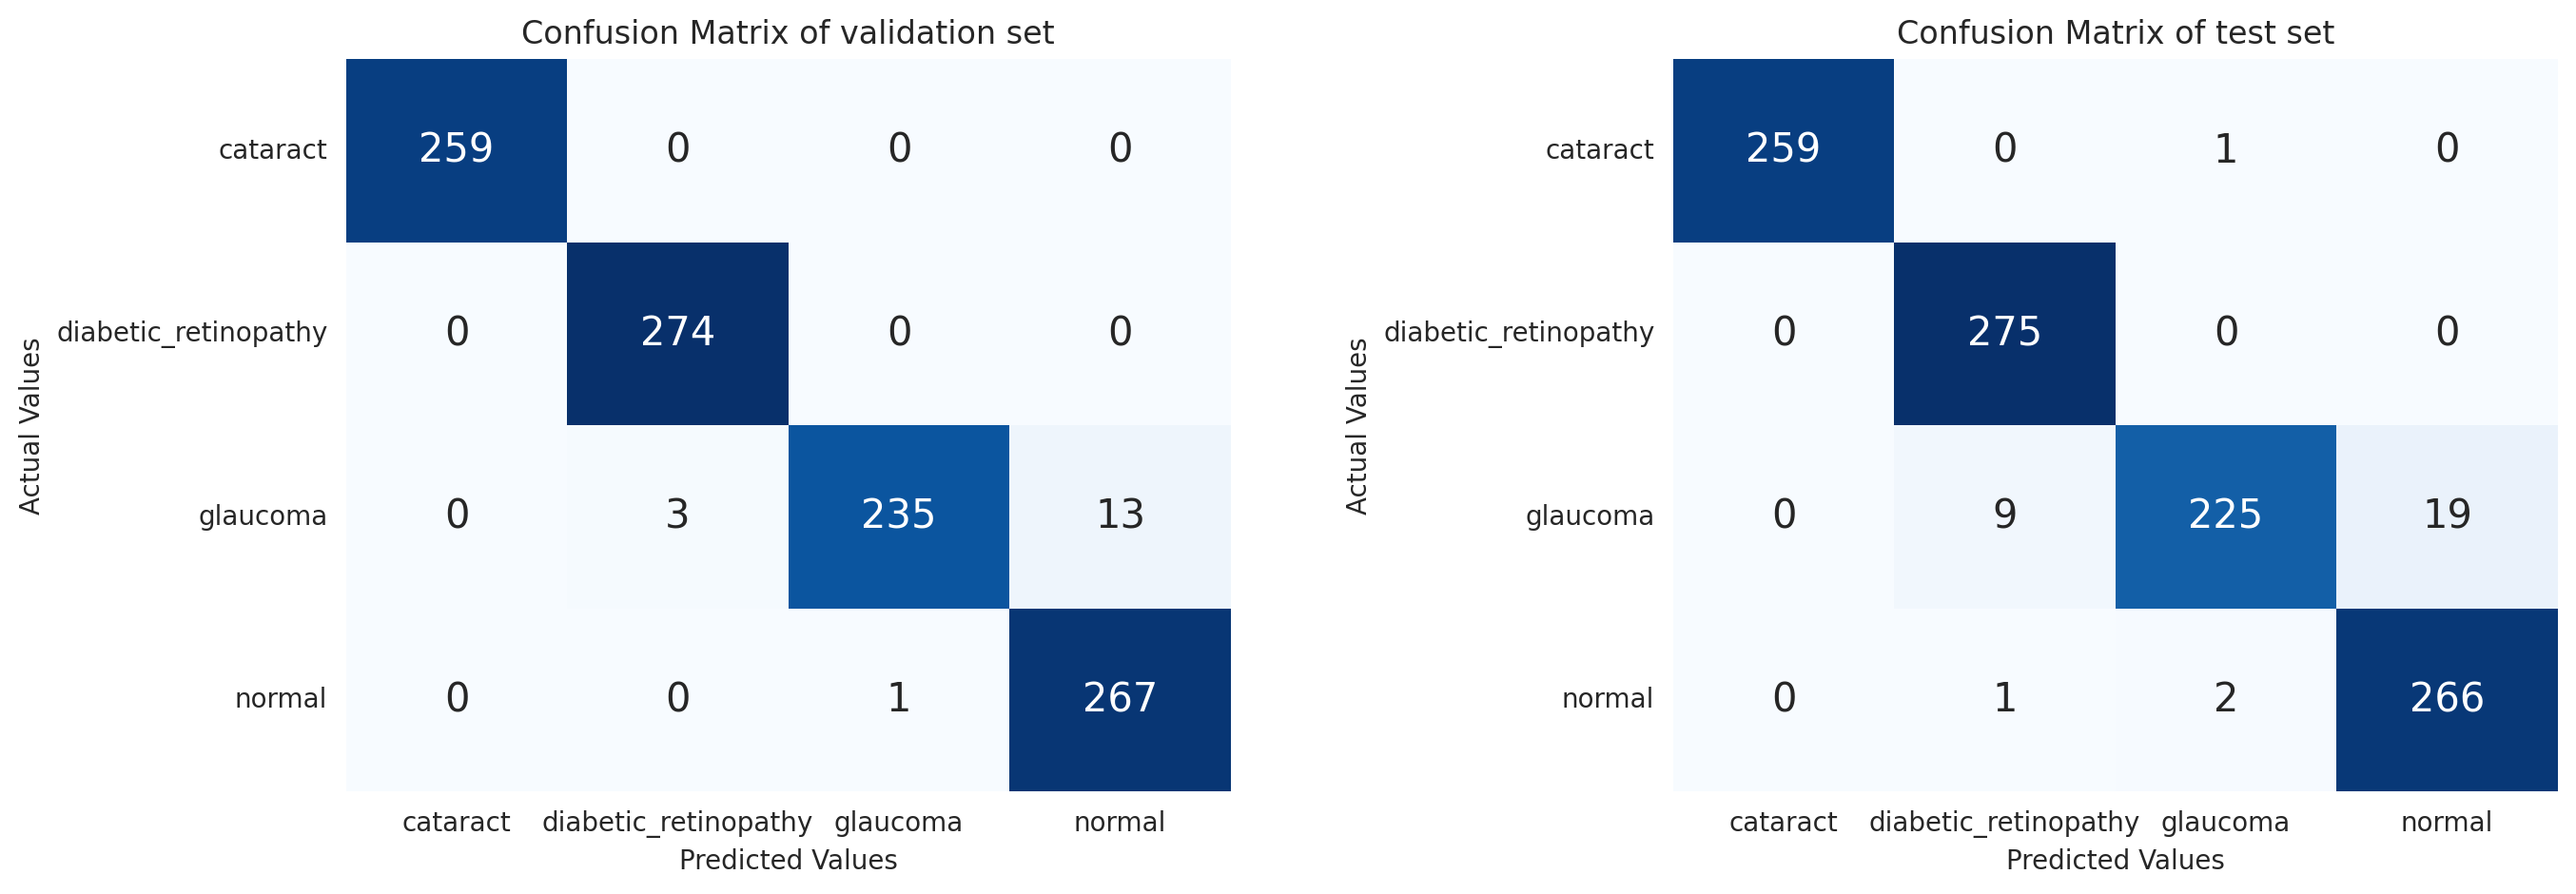

In [ ]:
#Plotting confusion matrices using heatmap
fig, axes = plt.subplots(1, 3, figsize=(15,5))
#sns.heatmap(train_cm_df, annot=True, cbar=False, cmap='Blues', vmin=0, fmt='.3g', annot_kws={"size": 15}, ax=axes[0])
#axes[0].set_title('Confusion Matrix of train set')
#axes[0].set_ylabel('Actual Values')
#axes[0].set_xlabel('Predicted Values')

sns.heatmap(val_cm_df, annot=True, cbar=False, cmap='Blues', vmin=0, fmt='.3g', annot_kws={"size": 15}, ax=axes[0])
axes[0].set_title('Confusion Matrix of validation set')
axes[0].set_ylabel('Actual Values')
axes[0].set_xlabel('Predicted Values')

sns.heatmap(test_cm_df, annot=True, cbar=False, cmap='Blues', vmin=0, fmt='.3g', annot_kws={"size": 15}, ax=axes[1])
axes[1].set_title('Confusion Matrix of test set')
axes[1].set_ylabel('Actual Values')
axes[1].set_xlabel('Predicted Values')

plt.subplots_adjust(wspace=0.5)

plt.show()

### **Classification report**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, test_preds, target_names=class_names, digits= 4))

                      precision    recall  f1-score   support

            cataract     1.0000    0.9962    0.9981       260
diabetic_retinopathy     0.9649    1.0000    0.9821       275
            glaucoma     0.9868    0.8893    0.9356       253
              normal     0.9333    0.9888    0.9603       269

           micro avg     0.9697    0.9697    0.9697      1057
           macro avg     0.9713    0.9686    0.9690      1057
        weighted avg     0.9708    0.9697    0.9693      1057
         samples avg     0.9697    0.9697    0.9697      1057



### **Misclassified test images**

In [ ]:
# extract test file names from test_ds
# this cannot do with tensorflow datasets that are prefetched autotuned
test_filenames = test_ds.file_paths

In [ ]:
len(test_filenames)

1057

In [ ]:
class_names

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

In [ ]:
# convert OHE to interger version of class_names for easier comparison
y_true = tf.argmax(test_labels, axis=1).numpy() # tensor object not iterable, use numpy to convert to list
y_pred = tf.argmax(test_preds, axis=1).numpy()
print('First 5 true labels:', y_true[:5])
print('First 5 predictions:', y_pred[:5])

error_list = []

for a, b, c, d in zip(y_true, y_pred, y_pred_probs, test_filenames):
  if a != b:
    error_list.append((class_names[a],class_names[b],c,d))

First 5 true labels: [0 0 0 0 0]
First 5 predictions: [0 0 0 0 0]


In [ ]:
len(error_list)

32

In [ ]:
print('Prediction accuracy on test data:', 100 - (len(error_list)*100/len(test_filenames)), '%')

Prediction accuracy on test data: 96.97256385998108 %


### **Looking into specific images that were misclassified**

In [ ]:
error_list[:5] # check for duplicates

[('cataract',
  'glaucoma',
  0.5533234,
  './work_directory/test/cataract/_228_4231065.jpg'),
 ('glaucoma',
  'diabetic_retinopathy',
  0.7644246,
  './work_directory/test/glaucoma/1209_left.jpg'),
 ('glaucoma',
  'diabetic_retinopathy',
  0.8563781,
  './work_directory/test/glaucoma/1209_right.jpg'),
 ('glaucoma',
  'diabetic_retinopathy',
  0.7455322,
  './work_directory/test/glaucoma/1211_right.jpg'),
 ('glaucoma',
  'diabetic_retinopathy',
  0.84430575,
  './work_directory/test/glaucoma/1213_right.jpg')]

In [ ]:
def print_in_color(txt_msg,fore_tupple=(0,255,255),back_tupple=(100,100,100)):
    #prints the text_msg in the foreground color specified by fore_tupple with the background specified by back_tupple
    #text_msg is the text, fore_tupple is foregroud color tupple (r,g,b), back_tupple is background tupple (r,g,b)
    # default parameter print in cyan foreground and gray background
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m'
    print(msg .format(mat), flush=True)
    print('\33[0m', flush=True) # returns default print color to back to black
    return

# example default print
msg='test of default colors'
print_in_color(msg)

test of default colors



In [ ]:
import re

print ('Below is a list of test files that were misclassified \n')
msg='{0:^10}{1:^30s}{2:^20s}{3:^20s}{4:^15s}'.format('No.','Test File','True Label','Predicted as','Probability')
print_in_color(msg)

for i, (a, b, c, d) in enumerate(error_list):
  x = re.split('./work_directory/test/', d)[-1]
  print('{0:^10}{1:^30s}{2:^20s}{3:^20s}  {4:.4f}'.format(i+1,x,a,b,c))

Below is a list of test files that were misclassified 

   No.              Test File                True Label         Predicted as      Probability  

    1       cataract/_228_4231065.jpg         cataract            glaucoma        0.5533
    2         glaucoma/1209_left.jpg          glaucoma      diabetic_retinopathy  0.7644
    3        glaucoma/1209_right.jpg          glaucoma      diabetic_retinopathy  0.8564
    4        glaucoma/1211_right.jpg          glaucoma      diabetic_retinopathy  0.7455
    5        glaucoma/1213_right.jpg          glaucoma      diabetic_retinopathy  0.8443
    6        glaucoma/1215_right.jpg          glaucoma      diabetic_retinopathy  0.8646
    7        glaucoma/1216_right.jpg          glaucoma      diabetic_retinopathy  0.9375
    8         glaucoma/1218_left.jpg          glaucoma      diabetic_retinopathy  0.7640
    9         glaucoma/1221_left.jpg          glaucoma      diabetic_retinopathy  0.8440
    10       glaucoma/1221_right.jpg          

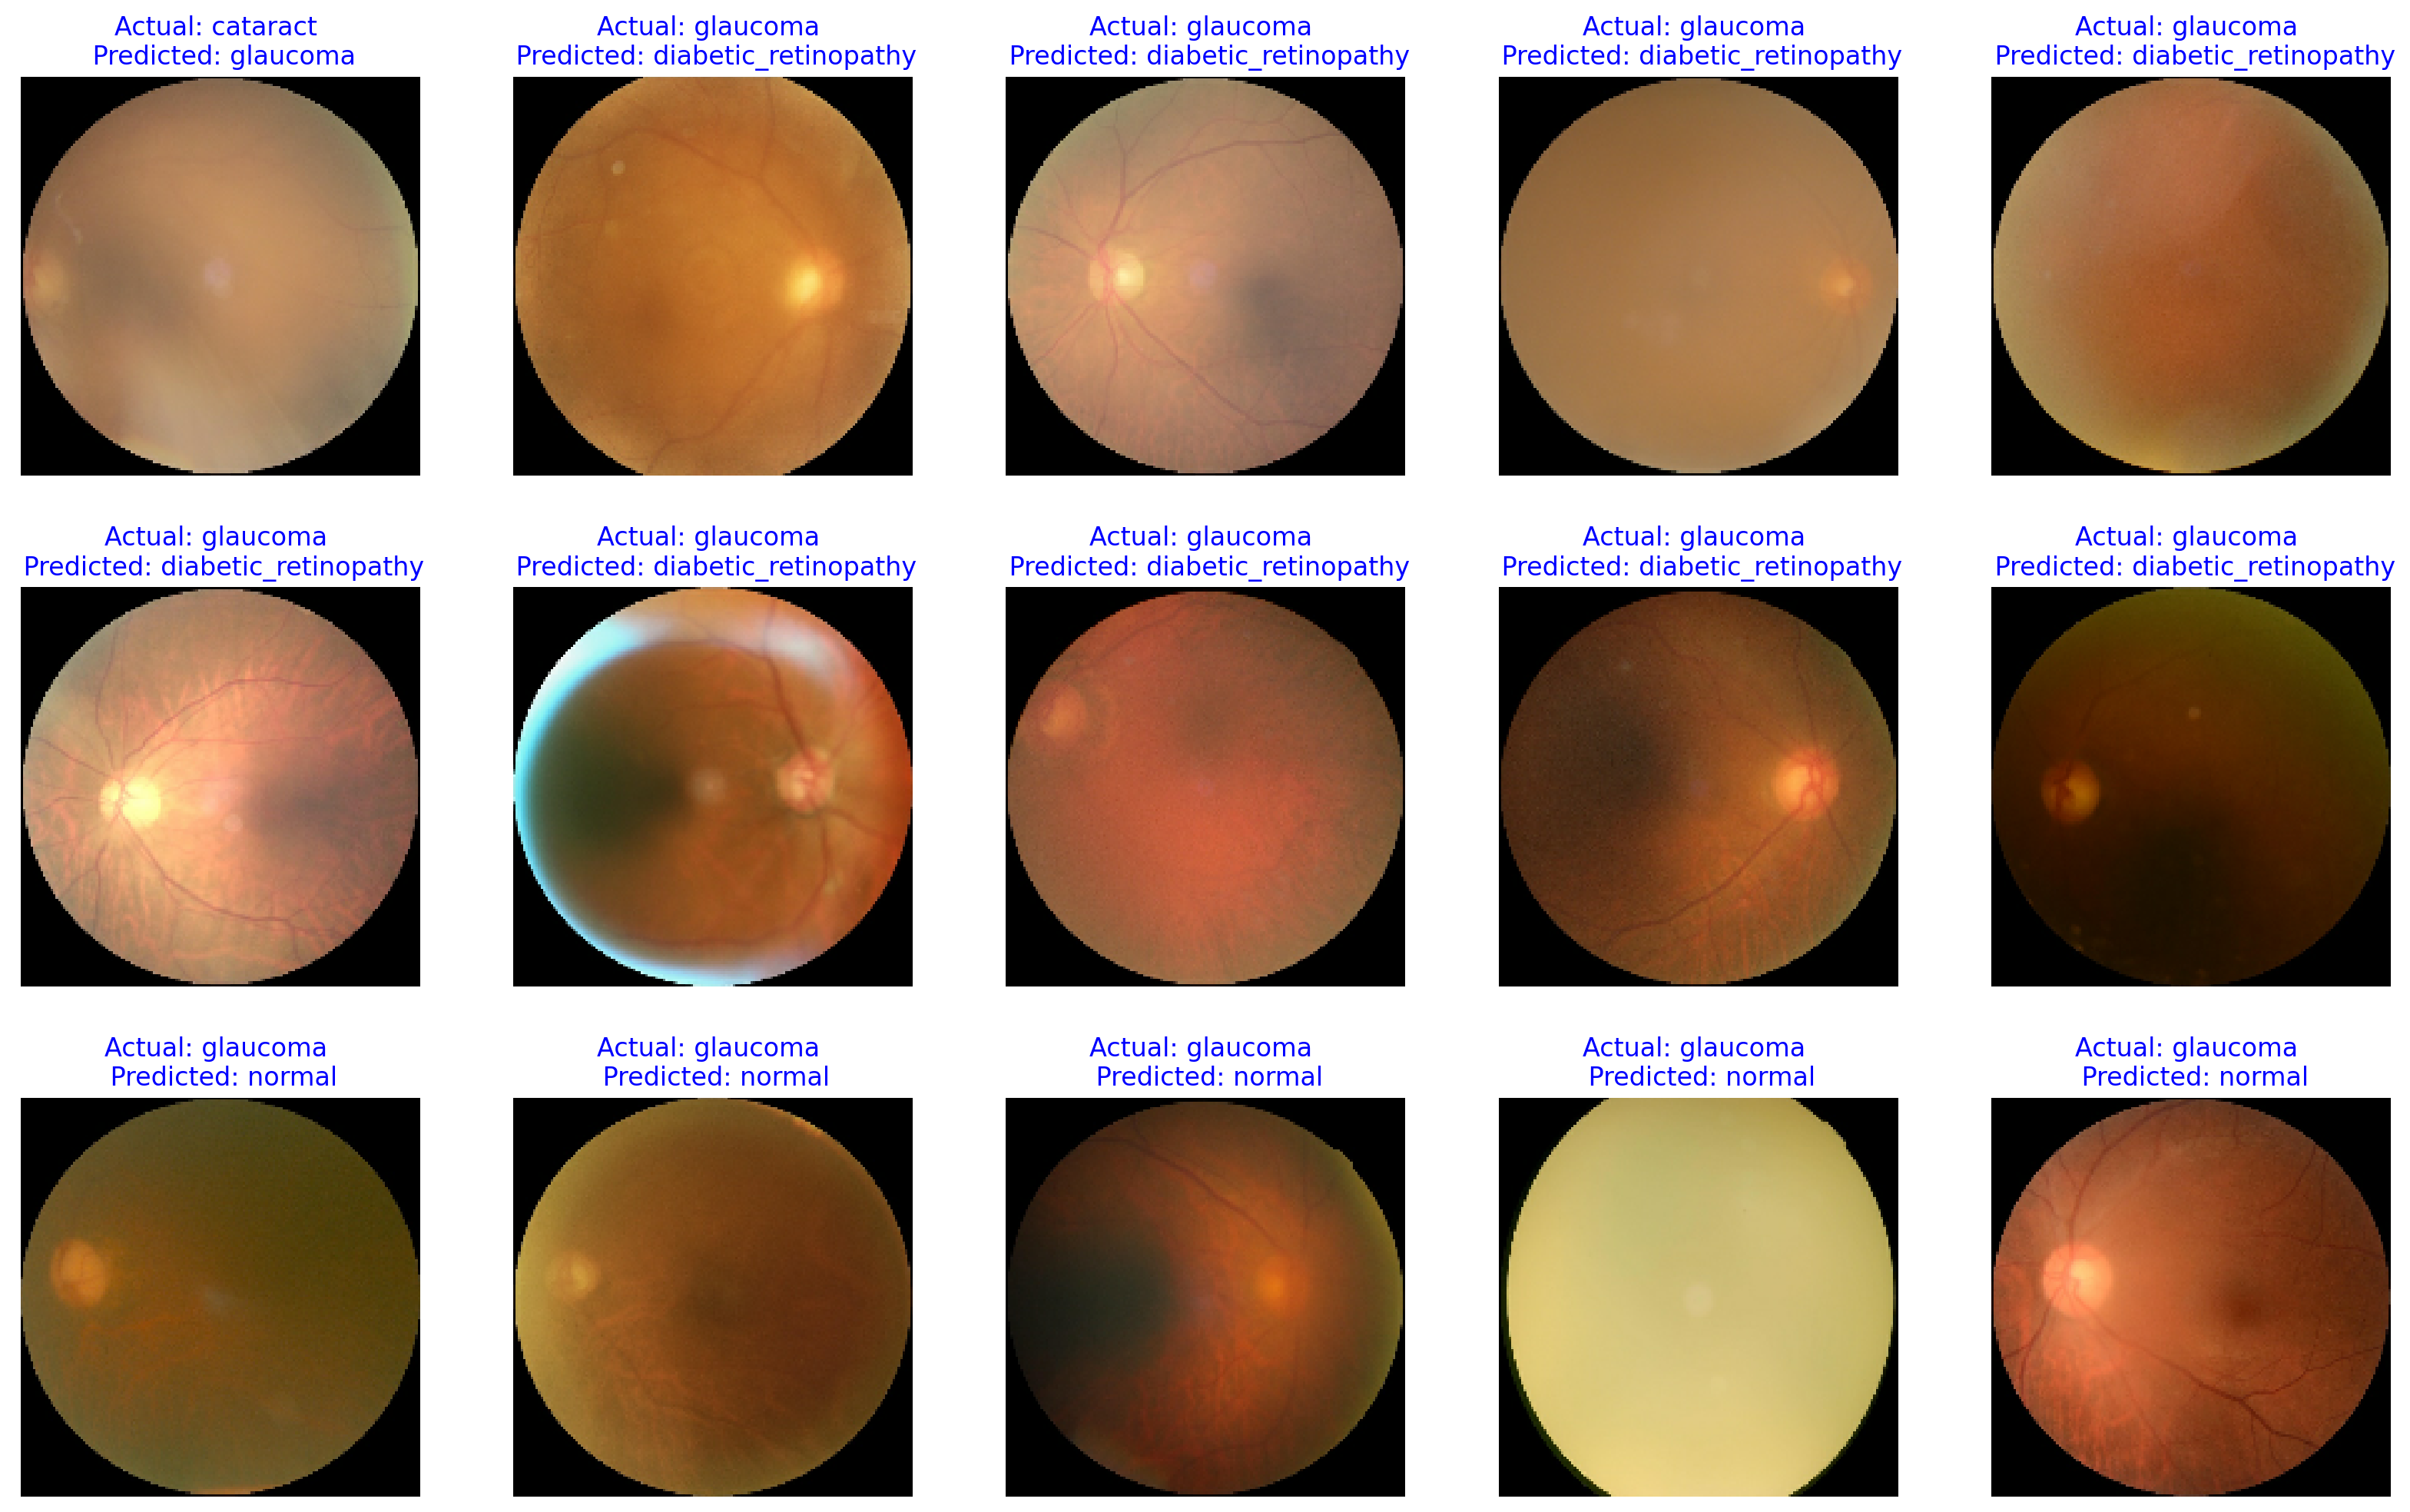

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a list called error_list containing (actual, predicted) pairs
# and test_images containing your test images

fig, axes = plt.subplots(3, 5, figsize=(20, 12)) # 3 rows, 5 cols

def axes_img(r, c, i):
    if i < len(error_list):
        axes[r, c].imshow(test_images[i].astype('uint8'))
        axes[r, c].axis('off')
        axes[r, c].set_title(f'Actual: {error_list[i][0]} \n Predicted: {error_list[i][1]}', color='blue')

# Loop through rows and columns to display images
for r in range(3):
    for c in range(5):
        i = r * 5 + c
        axes_img(r, c, i)

plt.subplots_adjust(hspace=0.28) # add space between rows
plt.show()
